## METABOLIC SIMULATIONS COMPARTMENT 3

### LOADING MODELS AND CHANGING MEDIUM  

In [1]:
import cobra
import numpy as np
from scipy.integrate import solve_ivp
from tqdm import tqdm
import matplotlib.pyplot as plt
chlorella = cobra.io.read_sbml_model("Model_iCZ946.xml")  # Ajusta a tu ruta
bacillus = cobra.io.read_sbml_model("iYO844.xml")

#### Unlocking exchange reactions

In [3]:
from cobra import Model, Reaction, Metabolite


# Actualizar el rango de flujo de las reacciones de intercambio
def actualizar_reacciones(modelo):
    intercambios = [
        'EX_h_LPAREN_e_RPAREN_', 'EX_h2o_LPAREN_e_RPAREN_', 'EX_pi_LPAREN_e_RPAREN_',
        'EX_nh4_LPAREN_e_RPAREN_', 'EX_no3_LPAREN_e_RPAREN_', 'EX_so4_LPAREN_e_RPAREN_',
        'EX_fe2_LPAREN_e_RPAREN_', 'EX_fe3_LPAREN_e_RPAREN_', 'EX_mg2_LPAREN_e_RPAREN_',
        'EX_na1_LPAREN_e_RPAREN_', 'EX_photonVis_LPAREN_e_RPAREN_', 'EX_o2_LPAREN_e_RPAREN_',
        'EX_co2_LPAREN_e_RPAREN_', 'EX_hco3_LPAREN_e_RPAREN_', 'EX_ac_LPAREN_e_RPAREN_',
        'EX_rib_DASH_D_LPAREN_e_RPAREN_', 'EX_no2_LPAREN_e_RPAREN_', 'EX_his_DASH_L_LPAREN_e_RPAREN_',
        'EX_urea_LPAREN_e_RPAREN_', 'EX_ad_LPAREN_e_RPAREN_', 'EX_gua_LPAREN_e_RPAREN_',
        'EX_ade_LPAREN_e_RPAREN_', 'EX_alltt_LPAREN_e_RPAREN_', 'EX_alltn_LPAREN_e_RPAREN_',
        'EX_hxan_LPAREN_e_RPAREN_', 'EX_orn_LPAREN_e_RPAREN_', 'EX_gln_DASH_L_LPAREN_e_RPAREN_',
        'EX_urate_LPAREN_e_RPAREN_', 'EX_leu_DASH_L_LPAREN_e_RPAREN_', 'EX_arg_DASH_L_LPAREN_e_RPAREN_',
        'EX_so3_LPAREN_e_RPAREN_', 'EX_s_LPAREN_e_RPAREN_', 'EX_selt_LPAREN_e_RPAREN_',
        'EX_etoh_LPAREN_e_RPAREN_', 'EX_for_LPAREN_e_RPAREN_', 'EX_h2_LPAREN_e_RPAREN_',
        'EX_glyclt_LPAREN_e_RPAREN_', 'EX_succ_LPAREN_e_RPAREN_', 'EX_lac_DASH_D_LPAREN_e_RPAREN_',
        'EX_6mpur_LPAREN_e_RPAREN_', 'EX_tgua_LPAREN_e_RPAREN_', 'EX_tega_LPAREN_e_RPAREN_',
        'EX_5flura_LPAREN_e_RPAREN_', 'EX_cital_LPAREN_e_RPAREN_', 'EX_lido_LPAREN_e_RPAREN_',
        'EX_glc_DASH_A_LPAREN_e_RPAREN_', 'EX_btn_LPAREN_e_RPAREN_', 'EX_thm_LPAREN_e_RPAREN_',
        'EX_ncam_LPAREN_e_RPAREN_', 'EX_met_DASH_L_LPAREN_e_RPAREN_', 'EX_trp_DASH_L_LPAREN_e_RPAREN_',
        'EX_gly_LPAREN_e_RPAREN_'
    ]
    for rxn_id in intercambios:
        try:
            rxn = modelo.reactions.get_by_id(rxn_id)
            rxn.lower_bound = -0.5
            rxn.upper_bound = 0.5
            print(f"Rango de flujo actualizado para {rxn_id}")
        except KeyError:
            print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_reacciones(chlorella)


Rango de flujo actualizado para EX_h_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_h2o_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_pi_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_nh4_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_no3_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_so4_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_fe2_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_fe3_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_mg2_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_na1_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_photonVis_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_o2_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_co2_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_hco3_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_ac_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_rib_DASH_D_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_no2_LPAREN_e_RPAREN_
Rango de flujo actualizado para EX_his_

#### Unlocking light availability

In [5]:
from cobra import Model, Reaction, Metabolite
# Actualizar el rango de flujo de una reacción específica
def actualizar_rango_reaccion(modelo, rxn_id, lower_bound, upper_bound):
    try:
        rxn = modelo.reactions.get_by_id(rxn_id)
        rxn.lower_bound = lower_bound
        rxn.upper_bound = upper_bound
        print(f"Rango de flujo actualizado para {rxn_id}: [{lower_bound}, {upper_bound}]")
    except KeyError:
        print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_rango_reaccion(chlorella, 'EX_photonVis_LPAREN_e_RPAREN_', -1000.0, 1000.0)

Rango de flujo actualizado para EX_photonVis_LPAREN_e_RPAREN_: [-1000.0, 1000.0]


#### Unlocking oxygen exchange

In [7]:
from cobra import Model, Reaction, Metabolite
# Actualizar el rango de flujo de una reacción específica
def actualizar_rango_reaccion(modelo, rxn_id, lower_bound, upper_bound):
    try:
        rxn = modelo.reactions.get_by_id(rxn_id)
        rxn.lower_bound = lower_bound
        rxn.upper_bound = upper_bound
        print(f"Rango de flujo actualizado para {rxn_id}: [{lower_bound}, {upper_bound}]")
    except KeyError:
        print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_rango_reaccion(chlorella, 'DM_o2D_LPAREN_u_RPAREN_', -1000.0, 1000.0)

Rango de flujo actualizado para DM_o2D_LPAREN_u_RPAREN_: [-1000.0, 1000.0]


#### Unlocking carbon dioxide exchange

In [9]:
from cobra import Model, Reaction, Metabolite
# Actualizar el rango de flujo de una reacción específica
def actualizar_rango_reaccion(modelo, rxn_id, lower_bound, upper_bound):
    try:
        rxn = modelo.reactions.get_by_id(rxn_id)
        rxn.lower_bound = lower_bound
        rxn.upper_bound = upper_bound
        print(f"Rango de flujo actualizado para {rxn_id}: [{lower_bound}, {upper_bound}]")
    except KeyError:
        print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_rango_reaccion(chlorella, 'EX_co2_LPAREN_e_RPAREN_', -1000.0, 1000.0)

Rango de flujo actualizado para EX_co2_LPAREN_e_RPAREN_: [-1000.0, 1000.0]


In [10]:
chlorella.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
ac_e,EX_ac_LPAREN_e_RPAREN_,0.5,2,2.90%
ad_e,EX_ad_LPAREN_e_RPAREN_,0.5,2,2.90%
arg_DASH_L_e,EX_arg_DASH_L_LPAREN_e_RPAREN_,0.5,6,8.70%
co2_e,EX_co2_LPAREN_e_RPAREN_,12.9,1,37.40%
glc_DASH_A_e,EX_glc_DASH_A_LPAREN_e_RPAREN_,0.5,6,8.70%
gln_DASH_L_e,EX_gln_DASH_L_LPAREN_e_RPAREN_,0.5,5,7.25%
gly_e,EX_gly_LPAREN_e_RPAREN_,0.5,2,2.90%
glyclt_e,EX_glyclt_LPAREN_e_RPAREN_,0.5,2,2.90%
h2o_e,EX_h2o_LPAREN_e_RPAREN_,0.5,0,0.00%
h_e,EX_h_LPAREN_e_RPAREN_,0.2221,0,0.00%


#### Unlocking exchange reactions

In [12]:
# Actualizar el rango de flujo de las reacciones de intercambio
def actualizar_reacciones(modelo):
    intercambios = [
        'EX_etha_e', 'EX_drib_e', 'EX_csn_e', 'EX_5mtr_e', 'EX_dtmp_e', 'EX_6pgc_e', 'EX_ctbt_e', 'EX_cu2_e',
        'EX_Larab_e', 'EX_ectoine_e', 'EX_cys__D_e', 'EX_cys__L_e', 'EX_eths_e', 'EX_cyst__L_e', 'EX_Lcyst_e',
        'EX_cytd_e', 'EX_abt__L_e', 'EX_etoh_e', 'EX_dad_2_e', 'EX_dcyt_e', 'EX_fe2_e', 'EX_dextrin_e', 'EX_dha_e',
        'EX_ac_e', 'EX_acac_e', 'EX_fe3_e', 'EX_ferrich_e', 'EX_diact_e', 'EX_djenk_e', 'EX_ferxa_e', 'EX_fol_e',
        'EX_acgam_e', 'EX_acmana_e', 'EX_acnam_e', 'EX_for_e', 'EX_fru_e', 'EX_actn__R_e', 'EX_ade_e', 'EX_adn_e',
        'EX_akg_e', 'EX_ala_B_e', 'EX_ala__D_e', 'EX_ala__L_e', 'EX_ala_L_Thr__L_e', 'EX_ala_L_asp__L_e',
        'EX_ala_L_gln__L_e', 'EX_ala_L_glu__L_e', 'EX_L_alagly_e', 'EX_ala_L_his__L_e', 'EX_ala_L_leu__L_e',
        'EX_g6p_e', 'EX_gal_e', 'EX_galctr__D_e', 'EX_galt_e', 'EX_galur_e', 'EX_gam6p_e', 'EX_gam_e',
        'EX_gbbtn_e', 'EX_glc__D_e', 'EX_glcn__D_e', 'EX_glcr_e', 'EX_glcur_e', 'EX_gln__L_e', 'EX_glu__D_e',
        'EX_alaala_e', 'EX_alltn_e', 'EX_amp_e', 'EX_amylase_e', 'EX_fum_e', 'EX_antim_e', 'EX_g1p_e',
        'EX_glu__L_e', 'EX_arab__D_e', 'EX_arab__L_e', 'EX_arbt_e', 'EX_arg__L_e', 'EX_argp_e', 'EX_arsenb_e',
        'EX_arsna_e', 'EX_arsni2_e', 'EX_asn__L_e', 'EX_asp__L_e', 'EX_bilea_e', 'EX_btd_RR_e', 'EX_glx_e',
        'EX_buts_e', 'EX_ca2_e', 'EX_cbl2_e', 'EX_pur_e', 'EX_pyr_e', 'EX_cd2_e', 'EX_gly_asn__L_e',
        'EX_cellb_e', 'EX_cgly_e', 'EX_raffin_e', 'EX_rib__D_e', 'EX_gly_asp__L_e', 'EX_ribflv_e', 'EX_chitob_e',
        'EX_gly_e', 'EX_chol_e', 'EX_rmn_e', 'EX_gly_gln__L_e', 'EX_chols_e', 'EX_chor_e', 'EX_cit_e',
        'EX_salcn_e', 'EX_gly_glu__L_e', 'EX_sbt__D_e', 'EX_ser__D_e', 'EX_citr__L_e', 'EX_cmp_e',
        'EX_ser__L_e', 'EX_gly_met__L_e', 'EX_so4_e', 'EX_spmd_e', 'EX_co2_e', 'EX_cobalt2_e', 'EX_crn_e',
        'EX_cro4_e', 'EX_srb__L_e', 'EX_starch_e', 'EX_subtilisin_e', 'EX_succ_e', 'EX_sucr_e',
        'EX_gly_pro__L_e', 'EX_sula_e', 'EX_taur_e', 'EX_glyb_e', 'EX_thiog_e', 'EX_glyc3p_e', 'EX_glyc_e',
        'EX_glyclt_e', 'EX_glycogen_e', 'EX_gmp_e', 'EX_gsn_e', 'EX_thr__L_e', 'EX_gthox_e', 'EX_thym_e',
        'EX_gthrd_e', 'EX_thymd_e', 'EX_gua_e', 'EX_tmp_e', 'EX_tre_e', 'EX_trp__L_e', 'EX_h2o2_e', 'EX_tyr__L_e',
        'EX_h2o_e', 'EX_ump_e', 'EX_ura_e', 'EX_h_e', 'EX_urate_e', 'EX_hexs_e', 'EX_urea_e', 'EX_uri_e',
        'EX_val__L_e', 'EX_xan_e', 'EX_xtsn_e', 'EX_xyl__D_e', 'EX_zn2_e', 'EX_hg2_e', 'EX_his__L_e',
        'EX_hqn_e', 'EX_hxan_e', 'EX_icit_e', 'EX_ile__L_e', 'EX_inost_e', 'EX_ins_e', 'EX_istnt_e',
        'EX_k_e', 'EX_lac__L_e', 'EX_lanth_e', 'EX_lcts_e', 'EX_leu__L_e', 'EX_lipt_e', 'EX_lys__L_e',
        'EX_madg_e', 'EX_mal__D_e', 'EX_mal__L_e', 'EX_malt_e', 'EX_malttr_e', 'EX_man1p_e', 'EX_man6p_e',
        'EX_man_e', 'EX_3ump_e', 'EX_mbdg_e', 'EX_melib_e', 'EX_meoh_e', 'EX_met__D_e', 'EX_met_L_ala__L_e',
        'EX_met__L_e', 'EX_metox__R_e', 'EX_metox_e', 'EX_mg2_e', 'EX_mn2_e', 'EX_mnl_e', 'EX_mobd_e',
        'EX_mops_e', 'EX_mso3_e', 'EX_na1_e', 'EX_nac_e', 'EX_nh4_e', 'EX_ni2_e', 'EX_no2_e', 'EX_no3_e',
        'EX_o2_e', 'EX_orn__L_e', 'EX_pala_e', 'EX_4abut_e', 'EX_pep_e', 'EX_phe__L_e', 'EX_pi_e',
        'EX_pnto__R_e', 'EX_ppa_e', 'EX_ppi_e', 'EX_pro__L_e', 'EX_prolb_e', 'EX_pser__D_e', 'EX_pser__L_e'
    ]
    for rxn_id in intercambios:
        try:
            rxn = modelo.reactions.get_by_id(rxn_id)
            rxn.lower_bound = -0.3
            rxn.upper_bound = 0.3
            print(f"Rango de flujo actualizado para {rxn_id}")
        except KeyError:
            print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_reacciones(bacillus)

Rango de flujo actualizado para EX_etha_e
Rango de flujo actualizado para EX_drib_e
Rango de flujo actualizado para EX_csn_e
Rango de flujo actualizado para EX_5mtr_e
Rango de flujo actualizado para EX_dtmp_e
Rango de flujo actualizado para EX_6pgc_e
Rango de flujo actualizado para EX_ctbt_e
Rango de flujo actualizado para EX_cu2_e
Rango de flujo actualizado para EX_Larab_e
Rango de flujo actualizado para EX_ectoine_e
Rango de flujo actualizado para EX_cys__D_e
Rango de flujo actualizado para EX_cys__L_e
Rango de flujo actualizado para EX_eths_e
Rango de flujo actualizado para EX_cyst__L_e
Rango de flujo actualizado para EX_Lcyst_e
Rango de flujo actualizado para EX_cytd_e
Rango de flujo actualizado para EX_abt__L_e
Rango de flujo actualizado para EX_etoh_e
Rango de flujo actualizado para EX_dad_2_e
Rango de flujo actualizado para EX_dcyt_e
Rango de flujo actualizado para EX_fe2_e
Rango de flujo actualizado para EX_dextrin_e
Rango de flujo actualizado para EX_dha_e
Rango de flujo actua

#### Unlocking carbon dioxide exchange

In [19]:
from cobra import Model, Reaction, Metabolite
# Actualizar el rango de flujo de una reacción específica
def actualizar_rango_reaccion(modelo, rxn_id, lower_bound, upper_bound):
    try:
        rxn = modelo.reactions.get_by_id(rxn_id)
        rxn.lower_bound = lower_bound
        rxn.upper_bound = upper_bound
        print(f"Rango de flujo actualizado para {rxn_id}: [{lower_bound}, {upper_bound}]")
    except KeyError:
        print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_rango_reaccion(bacillus, 'EX_co2_e', -1000.0, 1000.0)

Rango de flujo actualizado para EX_co2_e: [-1000.0, 1000.0]


#### Unlocking oxygen exchange

In [21]:
from cobra import Model, Reaction, Metabolite
# Actualizar el rango de flujo de una reacción específica
def actualizar_rango_reaccion(modelo, rxn_id, lower_bound, upper_bound):
    try:
        rxn = modelo.reactions.get_by_id(rxn_id)
        rxn.lower_bound = lower_bound
        rxn.upper_bound = upper_bound
        print(f"Rango de flujo actualizado para {rxn_id}: [{lower_bound}, {upper_bound}]")
    except KeyError:
        print(f"Reacción {rxn_id} no encontrada en el modelo.")

actualizar_rango_reaccion(bacillus, 'EX_o2_e', -1000.0, 1000.0)

Rango de flujo actualizado para EX_o2_e: [-1000.0, 1000.0]


In [22]:
bacillus.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
3ump_e,EX_3ump_e,0.3,9,3.29%
Larab_e,EX_Larab_e,0.3,15,5.49%
acac_e,EX_acac_e,0.3,4,1.46%
acnam_e,EX_acnam_e,0.3,11,4.02%
adn_e,EX_adn_e,0.1206,10,1.47%
akg_e,EX_akg_e,0.3,5,1.83%
alaala_e,EX_alaala_e,0.15,6,1.10%
amp_e,EX_amp_e,0.3,10,3.66%
arbt_e,EX_arbt_e,0.3,12,4.39%
argp_e,EX_argp_e,0.007292,6,0.05%


### Metabolic simulations

#### Crecimiento de chlorella en solitario

In [30]:
from collections import defaultdict
fluxes= defaultdict(list)
time = []
total_mets= chlorella_metabolites + bacillus_metabolites
# ================================
# 2. PARÁMETROS DEL SISTEMA
# ================================
# Condiciones iniciales: x1 (Chlorella), x2 (Bacillus), O2
y0 = [0.2, 1]  # Biomasa Chlorella, Biomasa Bacillus, Oxígeno (mmol/L)

# Tiempo de simulación
ts = np.linspace(0, 1000, 1000)

# Parámetros de muerte
d_1 = 0.01 # Tasa de muerte (1/h)

# IDs de las reacciones
chlorella_biomass_rxn = 'Biomass_Cvu_auto_DASH_'
bacillus_biomass_rxn = 'BIOMASS_BS_10'
chlorella_o2_exchange = "DM_o2D_LPAREN_u_RPAREN_"
bacillus_o2_exchange = 'EX_o2_e'
def dynamic_system(t, y):
    """Sistema: x1, x2, O2"""
    x1, O2  = y
    # Chlorella
    # ------------------
    with chlorella:
        sol_chl = chlorella.optimize()
        v1 = sol_chl.fluxes[chlorella_biomass_rxn]  # tasa de biomasa
        flux_o2_chl = sol_chl.fluxes[chlorella_o2_exchange]
        flux_co2_chl = sol_chl.fluxes["EX_co2_LPAREN_e_RPAREN_"]
        flux_nh4_chl = sol_chl.fluxes["EX_nh4_LPAREN_e_RPAREN_"]
        growth_rates["chlorella"].append(v1)
    # ------------------
    # Bacillus
    # ------------------
    # ------------------
    # Dinámica de biomasa con muerte y competencia
    # ------------------
    dx1_dt =  v1*x1*(1-x1) - x1*d_1
    # ------------------
    # Dinámica del oxígeno: flujo específico * biomasa
    # ------------------
    dO2_dt = flux_o2_chl * x1 - 0.03*x1
    # Progreso
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description(f't = {t:.2f} h')

    return [dx1_dt, dO2_dt]
    
dynamic_system.pbar = None

# ================================
# 5. EVENTO DE INFESABILIDAD (opcional)
# ================================
def infeasible_event(t, y):
    x1, O2 = y
    return x1 - 1e-3

infeasible_event.terminal = True
infeasible_event.direction = -1

# ================================
# 6. RESOLVER dFBA
# ================================
with tqdm() as pbar:
    dynamic_system.pbar = pbar
    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )

# ================================
# 7. PLOTEO
# ================================
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Chlorella Biomass (gDW/L)', color='green')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

NameError: name 'chlorella_metabolites' is not defined

#### Crecimiento de Bacillus en solitario

In [33]:
from collections import defaultdict
fluxes= defaultdict(list)
time = []
total_mets= chlorella_metabolites + bacillus_metabolites
# ================================
# 2. PARÁMETROS DEL SISTEMA
# ================================
# Condiciones iniciales: x1 (Chlorella), x2 (Bacillus), O2
y0 = [0.2, 1]  # Biomasa Chlorella, Biomasa Bacillus, Oxígeno (mmol/L)

# Tiempo de simulación
ts = np.linspace(0, 1000, 1000)

# Parámetros de muerte
d_2 = 0.01 # Tasa de muerte (1/h)

# IDs de las reacciones
chlorella_biomass_rxn = 'Biomass_Cvu_auto_DASH_'
bacillus_biomass_rxn = 'BIOMASS_BS_10'
chlorella_o2_exchange = "DM_o2D_LPAREN_u_RPAREN_"
bacillus_o2_exchange = 'EX_o2_e'
def dynamic_system(t, y):
    """Sistema: x1, x2, O2"""
    x2, CO2  = y
    # ------------------
    # Bacillus
    # ------------------
    with bacillus:
        sol_bac = bacillus.optimize()
        v2 = sol_bac.fluxes[bacillus_biomass_rxn]  # tasa de biomasa
        flux_o2_bac = sol_bac.fluxes[bacillus_o2_exchange]  # flujo real de O2 (+/-)
        flux_co2_bac = sol_bac.fluxes["EX_co2_e"]
        flux_nh4_bac = sol_bac.fluxes["EX_nh4_e"]
        growth_rates["bacillus"].append(v2)
    # ------------------
    # Dinámica de biomasa con muerte y competencia
    # ------------------
    dx2_dt =  v2*x2*(1- x2)- x2*d_2
    # ------------------
    # Dinámica del oxígeno: flujo específico * biomasa
    # ------------------
    dCO2_dt= flux_co2_bac * x2  - 0.03*x2   
    # Progreso
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description(f't = {t:.2f} h')

    return [dx2_dt, dCO2_dt]
    
dynamic_system.pbar = None

# ================================
# 5. EVENTO DE INFESABILIDAD (opcional)
# ================================
def infeasible_event(t, y):
    x2, CO2 = y
    return x2 - 1e-3

infeasible_event.terminal = True
infeasible_event.direction = -1

# ================================
# 6. RESOLVER dFBA
# ================================
with tqdm() as pbar:
    dynamic_system.pbar = pbar
    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )

# ================================
# 7. PLOTEO
# ================================
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Bacillus Biomass (gDW/L)', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[1], label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

NameError: name 'chlorella_metabolites' is not defined

#### Crecimiento en hiperciclo y dinámicas metabolitos

In [36]:
growth_rate_c =[]
co2_con=[]
growth_rate_b=[]
o2_con=[]
o2_prod=[]
o2_cons=[]
co2_prod=[]
co2_cons=[]

In [38]:
from collections import defaultdict
fluxes= defaultdict(list)
time = []
total_mets= chlorella_metabolites + bacillus_metabolites
# ================================
# 2. PARÁMETROS DEL SISTEMA
# ================================
# Condiciones iniciales: x1 (Chlorella), x2 (Bacillus), O2
y0 = [0.3, 0.2, 1, 1]  # Biomasa Chlorella, Biomasa Bacillus, Oxígeno (mmol/L)

# Tiempo de simulación
ts = np.linspace(0, 10000, 10000)

# Parámetros de muerte
d_1, d_2 = 0.008, 0.005# Tasa de muerte (1/h)

# IDs de las reacciones
chlorella_biomass_rxn = 'Biomass_Cvu_auto_DASH_'
bacillus_biomass_rxn = 'BIOMASS_BS_10'
chlorella_o2_exchange = "DM_o2D_LPAREN_u_RPAREN_"
bacillus_o2_exchange = 'EX_o2_e'
def dynamic_system(t, y):
    """Sistema: x1, x2, O2"""
    x1, x2, O2, CO2  = y
    uptake_o2 = - (1.8* O2 / (1 + O2))
    uptake_co2 = - (0.6 * CO2 / (0.1 + CO2))

    # ------------------
    # Chlorella
    # ------------------
    with chlorella:
        chlorella.reactions.get_by_id("EX_co2_LPAREN_e_RPAREN_").upper_bound = 1000
        chlorella.reactions.get_by_id("EX_co2_LPAREN_e_RPAREN_").lower_bound = uptake_co2
        sol_chl = chlorella.optimize()
        v1 = sol_chl.fluxes[chlorella_biomass_rxn]  # tasa de biomasa
        flux_o2_chl = sol_chl.fluxes[chlorella_o2_exchange]
        flux_co2_chl = sol_chl.fluxes["EX_co2_LPAREN_e_RPAREN_"]
        flux_nh4_chl = sol_chl.fluxes["EX_nh4_LPAREN_e_RPAREN_"]
    # ------------------
    # Bacillus
    # ------------------
    with bacillus:
        bacillus.reactions.get_by_id('EX_o2_e').upper_bound = 1000
        bacillus.reactions.get_by_id('EX_o2_e').lower_bound = uptake_o2
        sol_bac = bacillus.optimize()
        v2 = sol_bac.fluxes[bacillus_biomass_rxn]  # tasa de biomasa
        flux_o2_bac = sol_bac.fluxes[bacillus_o2_exchange]  # flujo real de O2 (+/-)
        flux_co2_bac = sol_bac.fluxes["EX_co2_e"]
        flux_nh4_bac = sol_bac.fluxes["EX_nh4_e"]
    # ------------------
    # Dinámica de biomasa con muerte y competencia
    # ------------------
    dx1_dt =  v1*x1*(1 - x1 - x2)- x1*d_1
    dx2_dt =  v2*x2*(1 - x1 - x2)- x2*d_2
    # ------------------
    # Dinámica del oxígeno: flujo específico * biomasa
    # ------------------
    dO2_dt = flux_o2_chl * x1  - flux_o2_bac * x2*(1 - x1 - x2)  - 0.1*O2
    dCO2_dt=  - flux_co2_bac* x1*(1 - x1 - x2) + flux_co2_bac * x2  - 0.6*CO2 

    co2_con.append(CO2)
    o2_con.append(O2)
    growth_rate_c.append(v1)
    growth_rate_b.append(v2)
    o2_prod.append(flux_o2_chl)
    o2_cons.append(abs(flux_o2_bac))
    co2_cons.append(abs(flux_co2_chl))
    co2_prod.append(flux_co2_bac)
    # Progreso
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description(f't = {t:.2f} h')

    return [dx1_dt, dx2_dt, dO2_dt, dCO2_dt]
    
dynamic_system.pbar = None

# ================================
# 5. EVENTO DE INFESABILIDAD (opcional)
# ================================
def infeasible_event(t, y):
    x1, x2, O2, CO2 = y
    return min(x1, x2) - 1e-3

infeasible_event.terminal = True
infeasible_event.direction = -1

# ================================
# 6. RESOLVER dFBA
# ================================
with tqdm() as pbar:
    dynamic_system.pbar = pbar
    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )
# ================================
# 7. PLOTEO
# ================================
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Chlorella Biomass (gDW/L)', color='green')
plt.plot(sol.t, sol.y[1], label='Bacillus Biomass (gDW/L)', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.plot(sol.t, sol.y[3], label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

NameError: name 'chlorella_metabolites' is not defined

#### Growth rates vs oxygen and arbon dioxide conentratins

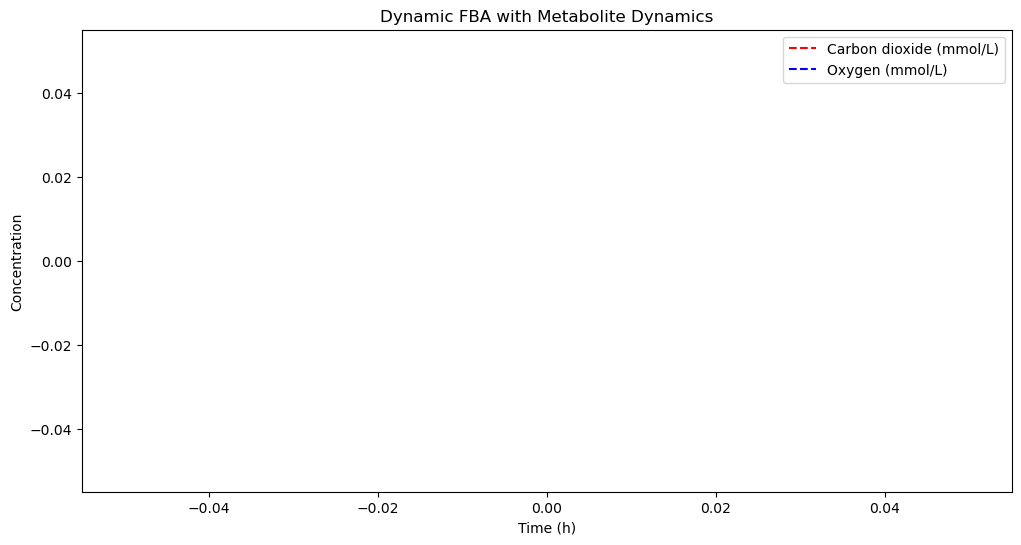

In [41]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(co2_con) + 1)
plt.plot(tiempo, co2_con, label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.plot(tiempo, o2_con, label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

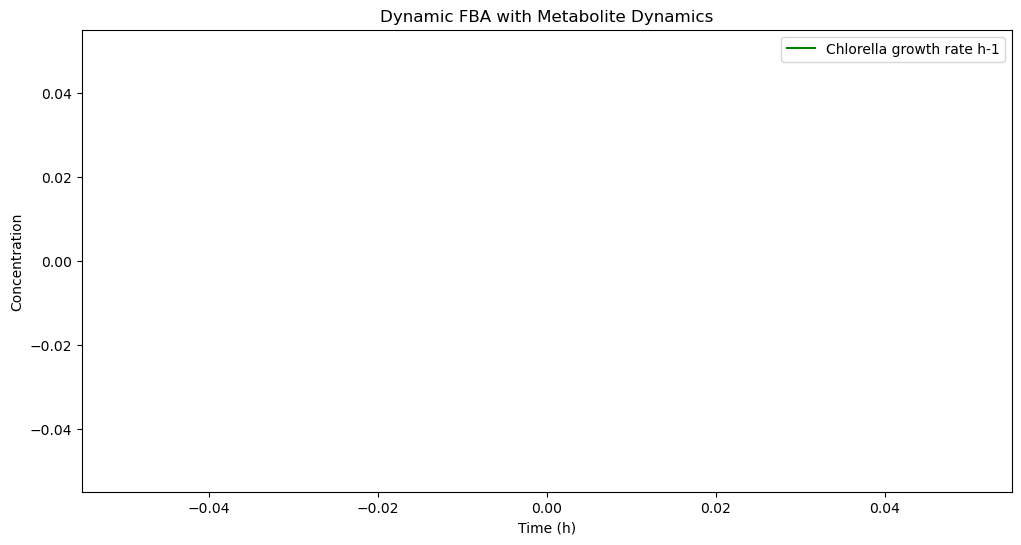

In [43]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(growth_rate_c) + 1)
plt.plot(tiempo, growth_rate_c, label='Chlorella growth rate h-1', color='green')
#plt.plot(tiempo, growth_rate_b, label='Bacillus growth rate h-1', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

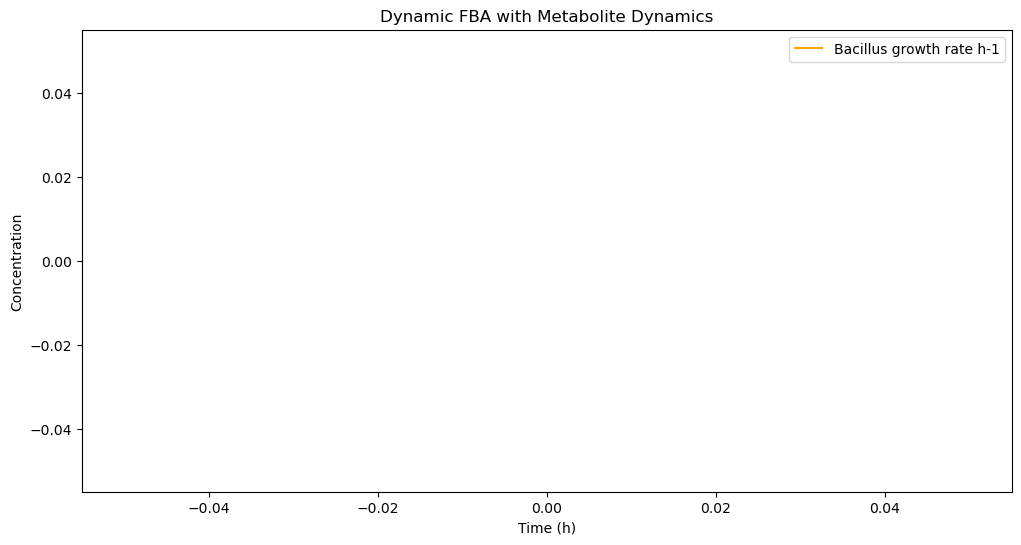

In [45]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(growth_rate_c) + 1)
plt.plot(tiempo, growth_rate_b, label='Bacillus growth rate h-1', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

#### Production of O2 and CO2 vs O2 and CO2 concentration 

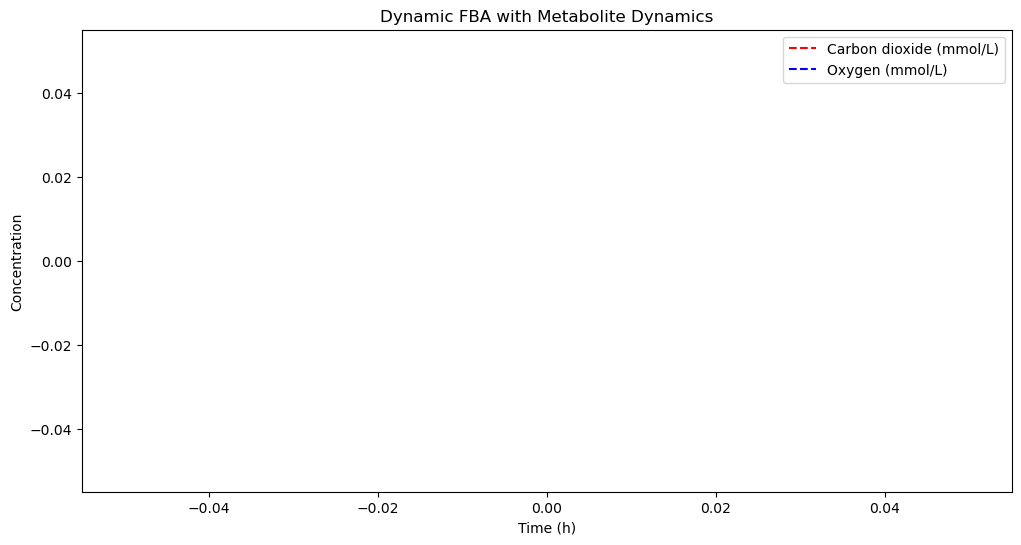

In [48]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(co2_con) + 1)
plt.plot(tiempo, co2_con, label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.plot(tiempo, o2_con, label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

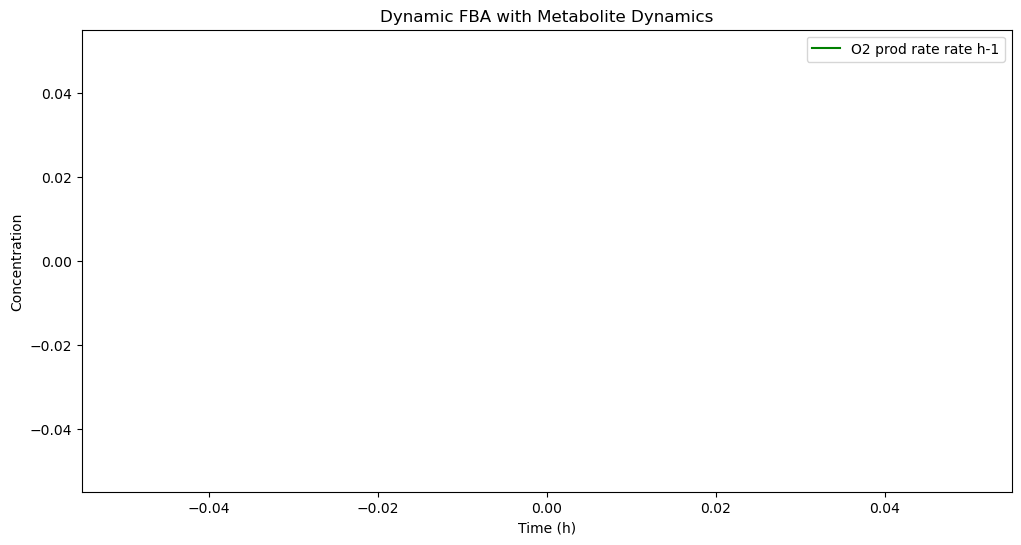

In [50]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(growth_rate_c) + 1)
plt.plot(tiempo, o2_prod, label='O2 prod rate rate h-1', color='green')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

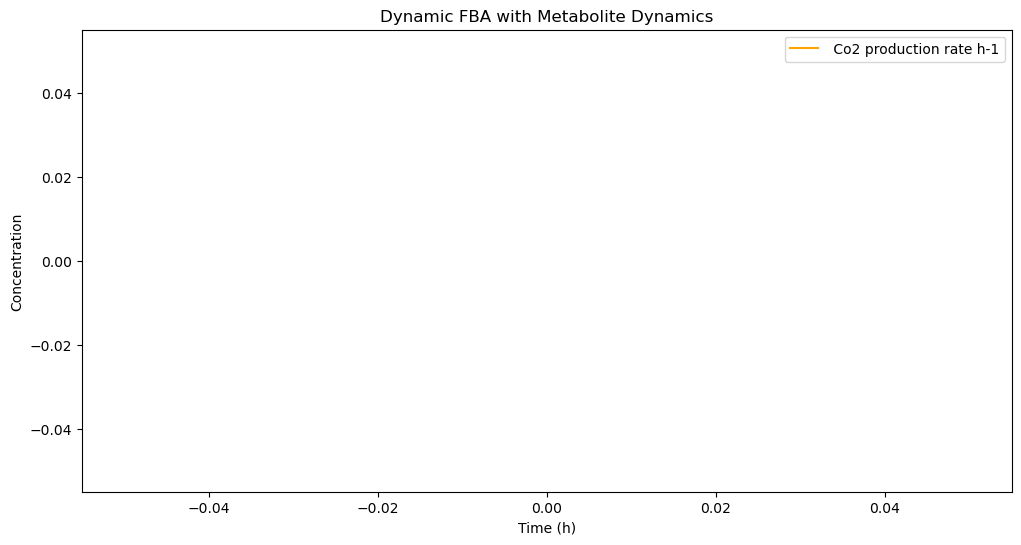

In [52]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(growth_rate_c) + 1)
plt.plot(tiempo, co2_prod, label=' Co2 production rate h-1', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

#### Consumption of O2 and CO2 vs O2 and CO2 concentration 

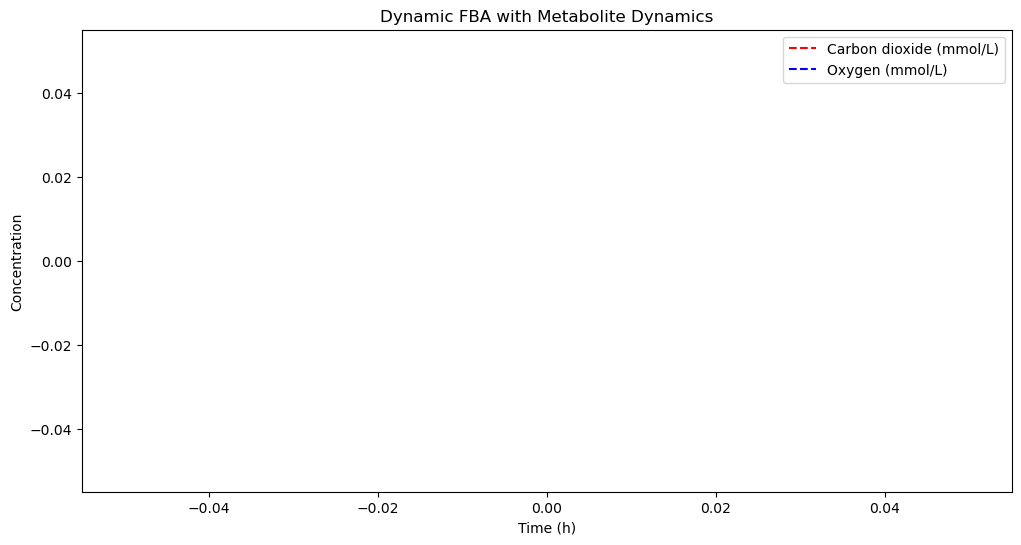

In [55]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(co2_con) + 1)
plt.plot(tiempo, co2_con, label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.plot(tiempo, o2_con, label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

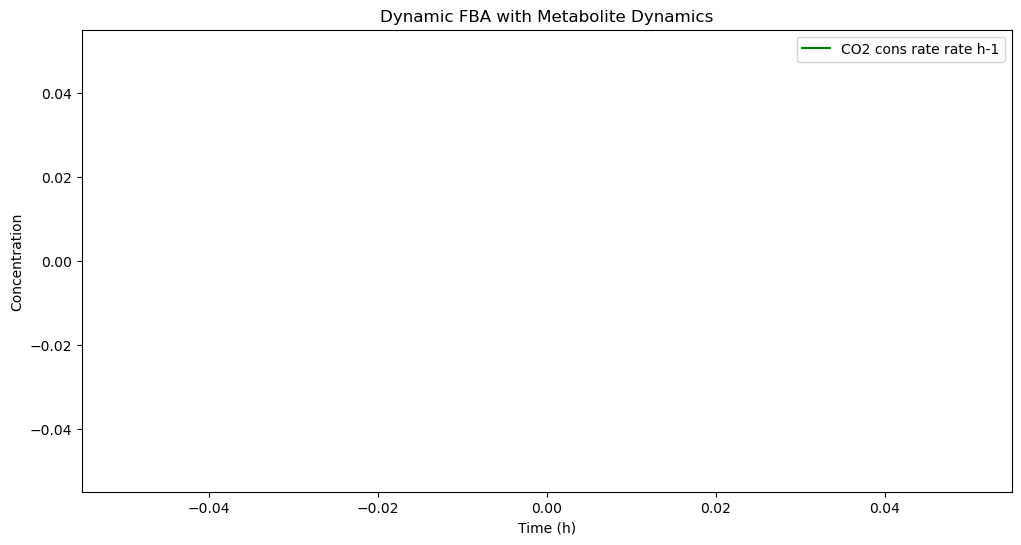

In [57]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(growth_rate_c) + 1)
plt.plot(tiempo, co2_cons, label='CO2 cons rate rate h-1', color='green')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

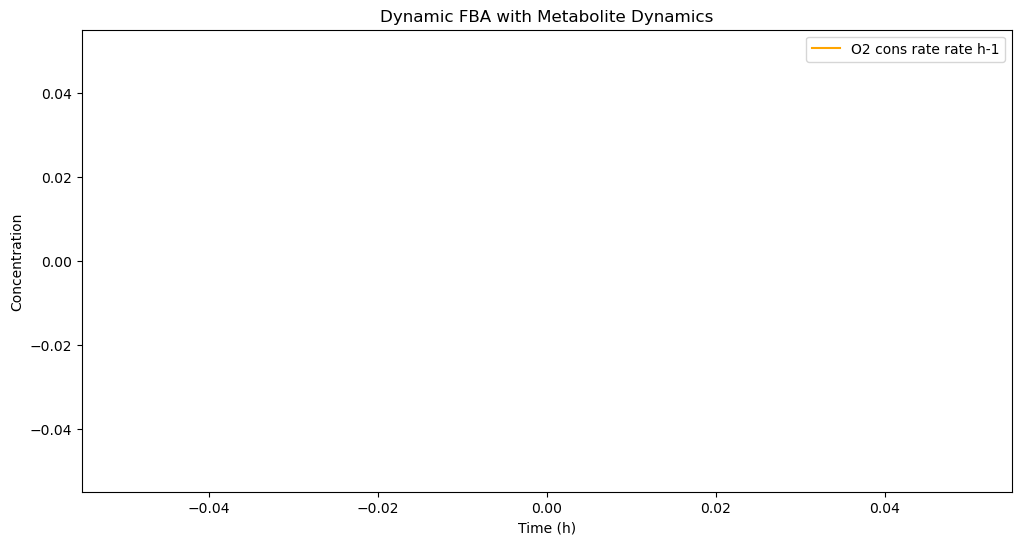

In [59]:
plt.figure(figsize=(12, 6))
tiempo = np.arange(1, len(growth_rate_c) + 1)
plt.plot(tiempo, o2_cons, label='O2 cons rate rate h-1', color='orange')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

In [61]:
chl_b= sol.y[0]
bac_b= sol.y[1]
o2_c = sol.y[2]
co2_c = sol.y[3]

NameError: name 'sol' is not defined

## Dsistribucion de nutrientes en el sistema: 

In [63]:
growth_rate_c =[]
co2_con=[]
growth_rate_b=[]
o2_con=[]
o2_prod=[]
o2_cons=[]
co2_prod=[]
co2_cons=[]

In [65]:
chlorella_metabolites = ['DM_udg_LPAREN_m_RPAREN_', 'EX_ac_LPAREN_e_RPAREN_', 'EX_ade_LPAREN_e_RPAREN_', 'EX_alltt_LPAREN_e_RPAREN_',
                         'EX_gly_LPAREN_e_RPAREN_', 'EX_gua_LPAREN_e_RPAREN_', 'EX_h2_LPAREN_e_RPAREN_', 'EX_h2o_LPAREN_e_RPAREN_',
                         'EX_h_LPAREN_e_RPAREN_', 'EX_nh4_LPAREN_e_RPAREN_', 'EX_urate_LPAREN_e_RPAREN_', 'EX_urea_LPAREN_e_RPAREN_']

bacillus_metabolites = ['EX_6pgc_e', 'EX_ac_e', 'EX_acac_e', 'EX_btd_RR_e', 'EX_for_e', 'EX_fum_e', 'EX_gam6p_e',
                        'EX_gly_e', 'EX_gsn_e', 'EX_gthox_e', 'EX_h_e', 'EX_icit_e', 'EX_lac__L_e', 'EX_man6p_e', 'EX_nh4_e',
                        'EX_pi_e', 'EX_pnto__R_e', 'EX_pser__L_e', 'EX_pyr_e', 'EX_srb__L_e', 'EX_succ_e', 'EX_thym_e',
                        'EX_tyr__L_e', 'EX_ura_e', 'EX_xan_e', 'EX_xtsn_e']

# Mapeo de metabolitos compartidos
metabolite_mapping = {
    'EX_ac_LPAREN_e_RPAREN_': 'EX_ac_e',
    'EX_h2o_LPAREN_e_RPAREN_': 'EX_h2o_e',
    'EX_h_LPAREN_e_RPAREN_': 'EX_h_e',
    'EX_nh4_LPAREN_e_RPAREN_': 'EX_nh4_e',
    'EX_gly_LPAREN_e_RPAREN_': 'EX_gly_e',
}

In [67]:
metabolitos_chlorella = {met: [] for met in ["EX_ade_LPAREN_e_RPAREN_", "EX_arg_DASH_L_LPAREN_e_RPAREN_", "EX_gua_LPAREN_e_RPAREN_", "EX_urea_LPAREN_e_RPAREN_", "DM_o2D_LPAREN_u_RPAREN_"]}
metabolitos_bacillus = {met: [] for met in [
    "EX_6pgc_e", "EX_ac_e", "EX_acac_e", "EX_btd_RR_e",
    "EX_for_e", "EX_fum_e", "EX_gam6p_e", "EX_gly_e", "EX_gsn_e", 
    "EX_gthox_e", "EX_h_e", "EX_icit_e", "EX_lac__L_e", "EX_man6p_e", 
    "EX_pi_e", "EX_pnto__R_e", "EX_pser__L_e", "EX_pyr_e", 
    "EX_srb__L_e", "EX_succ_e", "EX_thym_e", "EX_tyr__L_e", 
    "EX_ura_e", "EX_xan_e", "EX_xtsn_e", ]}
growth_rates= {"chlorella": [], "bacillus": [], "O2":[], "CO2": []}
metabolitos_fluxes = {met: [] for met in ["EX_ade_LPAREN_e_RPAREN_", "EX_arg_DASH_L_LPAREN_e_RPAREN_", "EX_gua_LPAREN_e_RPAREN_", "EX_urea_LPAREN_e_RPAREN_", "DM_o2D_LPAREN_u_RPAREN_", "O2", "CO2", "NH4",  "EX_6pgc_e", "EX_ac_e", "EX_acac_e", "EX_btd_RR_e",
    "EX_for_e", "EX_fum_e", "EX_gam6p_e", "EX_gly_e", "EX_gsn_e", 
    "EX_gthox_e", "EX_h_e", "EX_icit_e", "EX_lac__L_e", "EX_man6p_e", 
    "EX_pi_e", "EX_pnto__R_e", "EX_pser__L_e", "EX_pyr_e", 
    "EX_srb__L_e", "EX_succ_e", "EX_thym_e", "EX_tyr__L_e", 
    "EX_ura_e", "EX_xan_e", "EX_xtsn_e", ]}
metabolitos_categories = {met: [] for met in ["NH4", "Azúcares", "Fuentes_C", "Aminoacidos", "Protones", "Acidos orgánicos", "Otros nutrientes", "fosfato"]}
metabolitos_categories_fluxes= {met: [] for met in ["NH4", "Azúcares", "Fuentes_C", "Aminoacidos", "Protones", "Acidos orgánicos", "Otros nutrientes", "fosfato"]}


t = 10000.00 h: : 961it [00:13, 68.88it/s]


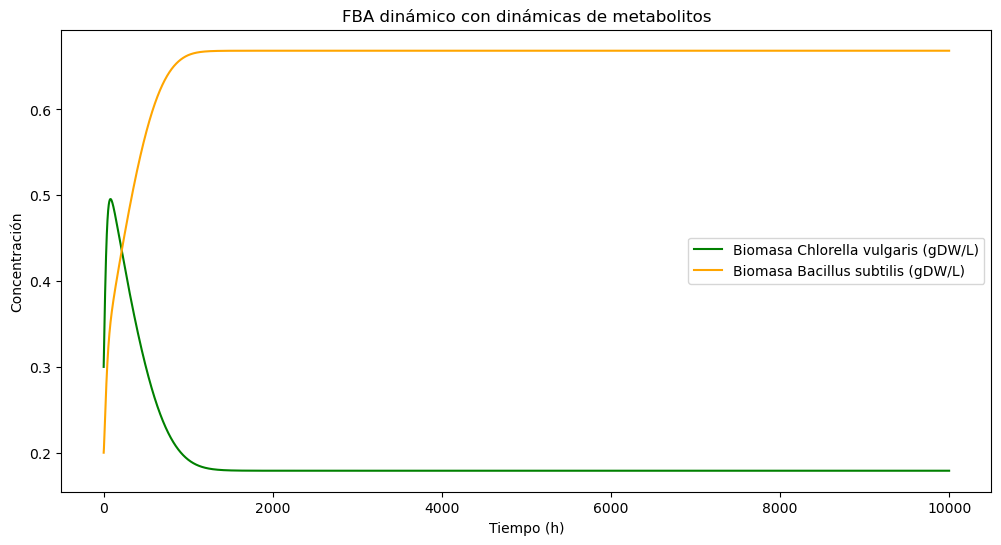

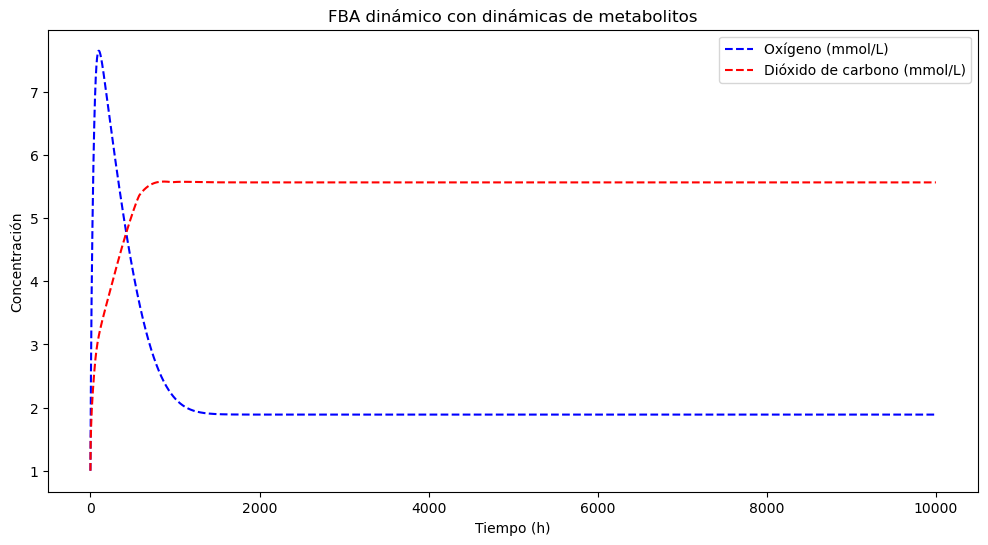

In [77]:
from collections import defaultdict
import numpy as np 
fluxes= defaultdict(list)
time = []
total_mets= chlorella_metabolites + bacillus_metabolites
# ================================
# 2. PARÁMETROS DEL SISTEMA
# ================================
# Condiciones iniciales: x1 (Chlorella), x2 (Bacillus), O2
y0 = [0.3, 0.2, 1, 1]  # Biomasa Chlorella, Biomasa Bacillus, Oxígeno (mmol/L)

# Tiempo de simulación
ts = np.linspace(0, 10000, 10000)

# Parámetros de muerte
d_1, d_2 = 0.008, 0.005# Tasa de muerte (1/h)

# IDs de las reacciones
chlorella_biomass_rxn = 'Biomass_Cvu_auto_DASH_'
bacillus_biomass_rxn = 'BIOMASS_BS_10'
chlorella_o2_exchange = "DM_o2D_LPAREN_u_RPAREN_"
bacillus_o2_exchange = 'EX_o2_e'
def dynamic_system(t, y):
    """Sistema: x1, x2, O2"""
    x1, x2, O2, CO2  = y
    uptake_o2 = - (1.8* O2 / (1 + O2))
    uptake_co2 = - (0.6 * CO2 / (0.1 + CO2))

    # ------------------
    # Chlorella
    # ------------------
    with chlorella:
        chlorella.reactions.get_by_id("EX_co2_LPAREN_e_RPAREN_").upper_bound = 1000
        chlorella.reactions.get_by_id("EX_co2_LPAREN_e_RPAREN_").lower_bound = uptake_co2
        sol_chl = chlorella.optimize()
        v1 = sol_chl.fluxes[chlorella_biomass_rxn]  # tasa de biomasa
        flux_o2_chl = sol_chl.fluxes[chlorella_o2_exchange]
        flux_co2_chl = sol_chl.fluxes["EX_co2_LPAREN_e_RPAREN_"]
        flux_nh4_chl = sol_chl.fluxes["EX_nh4_LPAREN_e_RPAREN_"]
    # ------------------
    # Bacillus
    # ------------------
    with bacillus:
        bacillus.reactions.get_by_id('EX_o2_e').upper_bound = 1000
        bacillus.reactions.get_by_id('EX_o2_e').lower_bound = uptake_o2
        sol_bac = bacillus.optimize()
        v2 = sol_bac.fluxes[bacillus_biomass_rxn]  # tasa de biomasa
        flux_o2_bac = sol_bac.fluxes[bacillus_o2_exchange]  # flujo real de O2 (+/-)
        flux_co2_bac = sol_bac.fluxes["EX_co2_e"]
        flux_nh4_bac = sol_bac.fluxes["EX_nh4_e"]
    # ------------------
    # Dinámica de biomasa con muerte y competencia
    # ------------------
    # ------------------
    dx1_dt =  v1*x1*(1 - x1 - x2)- x1*d_1
    dx2_dt =  v2*x2*(1 - x1 - x2)- x2*d_2
    # ------------------
    # Dinámica del oxígeno: flujo específico * biomasa
    # ------------------
    dO2_dt = flux_o2_chl * x1 + flux_o2_bac * x2*(1 - x1 - x2)  - 0.1*O2
    dCO2_dt= flux_co2_chl * x1*(1 - x1 - x2) + flux_co2_bac * x2  - 0.6*CO2 
    
    NH4 = flux_nh4_chl * x1 + flux_nh4_bac * x2 
    Azucares = sol_bac.fluxes["EX_6pgc_e"]*x2 + sol_bac.fluxes["EX_gam6p_e"]*x2 + sol_bac.fluxes["EX_man6p_e"]*x2 + sol_bac.fluxes["EX_srb__L_e"]*x2
    Fuentes_C= sol_bac.fluxes["EX_ac_e"]*x2 + sol_bac.fluxes["EX_acac_e"]*x2 + sol_bac.fluxes["EX_btd_RR_e"]*x2 + sol_bac.fluxes["EX_for_e"]*x2 + sol_bac.fluxes["EX_lac__L_e"]*x2 + sol_bac.fluxes["EX_pyr_e"]*x2 + sol_bac.fluxes["EX_succ_e"]*x2
    Aminoacidos = sol_chl.fluxes["EX_arg_DASH_L_LPAREN_e_RPAREN_"]*x1 + sol_bac.fluxes["EX_gly_e"]*x2 + sol_bac.fluxes["EX_pser__L_e"]*x2 + sol_bac.fluxes["EX_tyr__L_e"]*x2 
    Protones= sol_bac.fluxes["EX_h_e"]*x2
    Ácidos_organicos= sol_bac.fluxes["EX_pnto__R_e"]*x2 
    Other_nutrients= sol_chl.fluxes["EX_ade_LPAREN_e_RPAREN_"]*x1 + sol_chl.fluxes["EX_gua_LPAREN_e_RPAREN_"]*x1 +sol_bac.fluxes["EX_gsn_e"]*x2 + sol_bac.fluxes["EX_gthox_e"]*x2 + sol_bac.fluxes["EX_thym_e"]*x2 + sol_bac.fluxes["EX_ura_e"]*x2 +sol_bac.fluxes["EX_xan_e"]*x2 + sol_bac.fluxes["EX_xtsn_e"]*x2
    phosphate= sol_bac.fluxes["EX_pi_e"]*x2
    growth_rates["O2"].append(flux_o2_chl + flux_o2_bac)
    growth_rates["CO2"].append(flux_co2_bac + flux_co2_chl)
    co2_con.append(CO2)
    o2_con.append(O2)
    growth_rate_c.append(v1)
    growth_rate_b.append(v2)
    o2_prod.append(flux_o2_chl)
    o2_cons.append(abs(flux_o2_bac))
    co2_cons.append(abs(flux_co2_chl))
    co2_prod.append(flux_co2_bac)
    metabolitos_categories["NH4"].append(abs(NH4))
    metabolitos_categories["Azúcares"].append(abs(Azucares))
    metabolitos_categories["Fuentes_C"].append(Fuentes_C)
    metabolitos_categories["Aminoacidos"].append(abs(Aminoacidos))
    metabolitos_categories["Protones"].append(abs(Protones))
    metabolitos_categories["Acidos orgánicos"].append(abs(Ácidos_organicos))
    metabolitos_categories["Otros nutrientes"].append(abs(Other_nutrients))
    metabolitos_categories["fosfato"].append(abs(phosphate))
    # Progreso
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description(f't = {t:.2f} h')

    return [dx1_dt, dx2_dt, dO2_dt, dCO2_dt]
    
dynamic_system.pbar = None

# ================================
# 5. EVENTO DE INFESABILIDAD (opcional)
# ================================
def infeasible_event(t, y):
    x1, x2, O2, CO2 = y
    return min(x1, x2) - 1e-3

infeasible_event.terminal = True
infeasible_event.direction = -1

# ================================
# 6. RESOLVER dFBA
# ================================
with tqdm() as pbar:
    dynamic_system.pbar = pbar
    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )
# ================================
# 7. PLOTEO
# ================================
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Biomasa Chlorella vulgaris (gDW/L)', color='green')
plt.plot(sol.t, sol.y[1], label='Biomasa Bacillus subtilis (gDW/L)', color='orange')
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración')
plt.title('FBA dinámico con dinámicas de metabolitos')
plt.legend()
plt.savefig('FBA_dinámico.png', dpi=300, bbox_inches='tight')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='Oxígeno (mmol/L)', linestyle='--', color='blue')
plt.plot(sol.t, sol.y[3], label='Dióxido de carbono (mmol/L)', linestyle='--', color='red')
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración')
plt.title('FBA dinámico con dinámicas de metabolitos')
plt.legend()
plt.savefig('FBA_dinámico1.png', dpi=300, bbox_inches='tight')
plt.show()

In [78]:
chl_b= sol.y[0]
bac_b= sol.y[1]
o2_c = sol.y[2]
co2_c = sol.y[3]

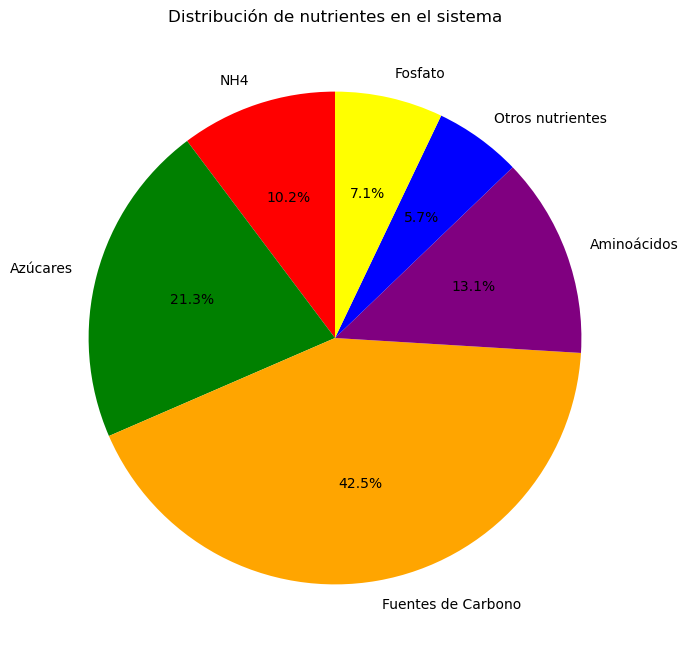

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Datos de ejemplo: reemplaza estos valores con los resultados finales de tu simulación
# Puedes usar el último valor de cada uno de tus arrays de metabolitos
nutrientes = {
    "NH4": metabolitos_categories["NH4"][-1],
    "Azúcares":  metabolitos_categories["Azúcares"][-1],
    "Fuentes de Carbono": metabolitos_categories["Fuentes_C"][-1],
    "Aminoácidos": metabolitos_categories["Aminoacidos"][-1],
    "Otros nutrientes": metabolitos_categories["Otros nutrientes"][-1],
    "Fosfato": metabolitos_categories["fosfato"][-1],
}

# Crear el gráfico de pastel
fig, ax = plt.subplots(figsize=(8, 8))
labels = list(nutrientes.keys())
sizes = list(nutrientes.values())

# Colores personalizados
colors = ['red', 'green', 'orange', 'purple','blue', 'yellow']

ax.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
ax.set_title('Distribución de nutrientes en el sistema')
plt.savefig('Distro_nutrientes.png', dpi=300, bbox_inches='tight')
plt.show()


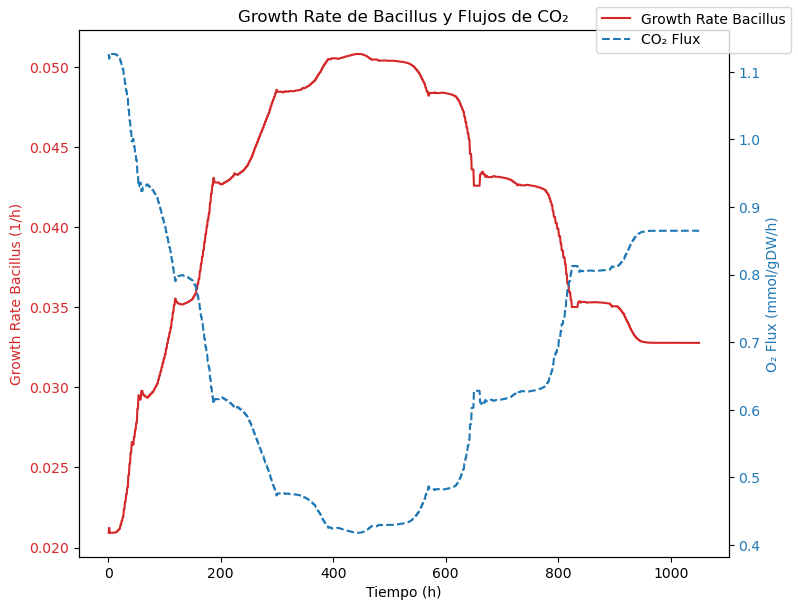

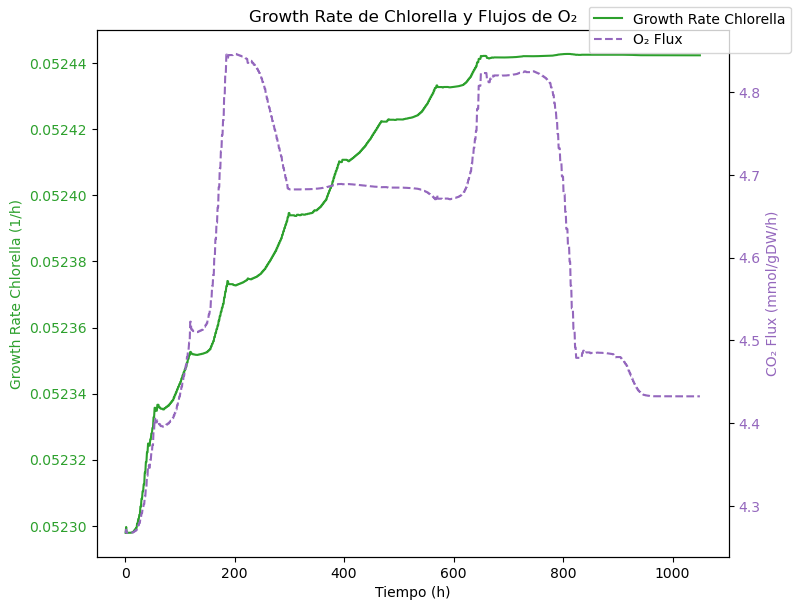

In [94]:
import matplotlib.pyplot as plt
import numpy as np

def grafico_estilo_paper(growth_rates):
    tiempo = np.arange(1, len(growth_rate_b) + 1)

    # Gráfico 1: Growth Rate de Bacillus y Flujos de CO₂
    fig, ax1 = plt.subplots(figsize=(8, 6))

    color = 'tab:red'
    ax1.set_xlabel('Tiempo (h)')
    ax1.set_ylabel('Growth Rate Bacillus (1/h)', color=color)
    ax1.plot(tiempo, growth_rate_b, color=color, linestyle='-', label='Growth Rate Bacillus')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('O₂ Flux (mmol/gDW/h)', color=color)
    ax2.plot(tiempo, growth_rates['O2'], color=color, linestyle='--', label='CO₂ Flux')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title("Growth Rate de Bacillus y Flujos de CO₂")
    fig.legend(loc='upper right')
    plt.show()

    # Gráfico 2: Growth Rate de Chlorella y Flujos de O₂
    fig, ax1 = plt.subplots(figsize=(8, 6))

    color = 'tab:green'
    ax1.set_xlabel('Tiempo (h)')
    ax1.set_ylabel('Growth Rate Chlorella (1/h)', color=color)
    ax1.plot(tiempo, growth_rate_c, color=color,  linestyle='-', label='Growth Rate Chlorella')
    ax1.tick_params(axis='y', labelcolor=color)

    ax2 = ax1.twinx()
    color = 'tab:purple'
    ax2.set_ylabel('CO₂ Flux (mmol/gDW/h)', color=color)
    ax2.plot(tiempo, growth_rates['CO2'], color=color, linestyle='--', label='O₂ Flux')
    ax2.tick_params(axis='y', labelcolor=color)

    fig.tight_layout()
    plt.title("Growth Rate de Chlorella y Flujos de O₂")
    fig.legend(loc='upper right')
    plt.show()



grafico_estilo_paper(growth_rates)

## Aproximación matemática

t = 1176.78 h: : 418it [00:00, 4821.44it/s]


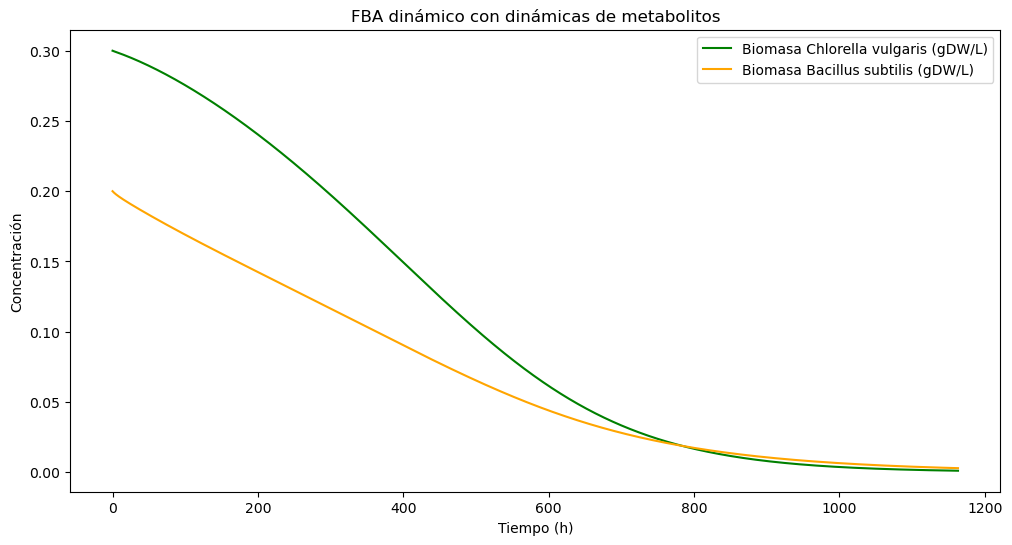

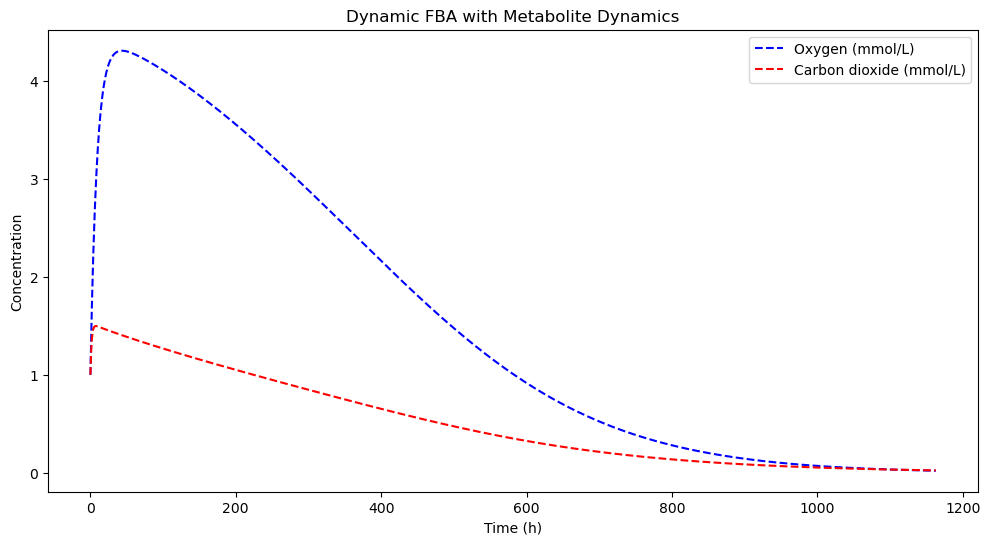

In [9]:
from collections import defaultdict
import cobra
import numpy as np
from scipy.integrate import solve_ivp
from tqdm import tqdm
import matplotlib.pyplot as plt
fluxes= defaultdict(list)
time = []
# ================================
# 2. PARÁMETROS DEL SISTEMA
# ================================
# Condiciones iniciales: x1 (Chlorella), x2 (Bacillus), O2
y0 = [0.3, 0.2, 1, 1 ]  # Biomasa Chlorella, Biomasa Bacillus, Oxígeno (mmol/L)

# Tiempo de simulación
ts = np.linspace(0, 10000, 10000)

# Parámetros de muerte
d_1, d_2 = 0.008, 0.005
c4 = 1.88
c5 = 0.684555
c1 = 0.05425/ 0.684555
c2 = 0.0515/ 1.88
c3 = 1.99
c6 = 5.06
do2= 0.1
dco2= 0.6
# IDs de las reacciones
chlorella_biomass_rxn = 'Biomass_Cvu_auto_DASH_'
bacillus_biomass_rxn = 'BIOMASS_BS_10'
chlorella_o2_exchange = "DM_o2D_LPAREN_u_RPAREN_"
bacillus_o2_exchange = 'EX_o2_e'
def dynamic_system(t, y):
    x1, x2, O2, CO2  = y
    # ------------------
    # Dinámica de biomasa con muerte y competencia
    # ------------------
    # dx1_dt =  c1* (1.8* O2 / (1 + O2))*x1*(1 - x1 - x2)- x1*d_1
   # dx2_dt =  c2*(0.6* CO2 / (0.1 + CO2))*x2*(1 - x1 - x2)- x2*d_2
    dx1_dt = c1*(CO2/(0.1+CO2))*x1*x2*(1 - x1 - x2)- x1*d_1
    dx2_dt = c2*(O2/(1+O2))*x2*x1*(1 - x1 - x2)- x2*d_2
    # ------------------
    # Dinámica del oxígeno: flujo específico * biomasa
    # ------------------
    dO2_dt = c3*x1 - c4*(O2/(1+O2))*x2*(1 - x1 - x2)  - do2*O2
    dCO2_dt= -c5*(CO2/(0.1+CO2))*x1*(1 - x1 - x2) + c6*x2  - dco2*CO2 
    # Progreso
    if dynamic_system.pbar is not None:
        dynamic_system.pbar.update(1)
        dynamic_system.pbar.set_description(f't = {t:.2f} h')

    return [dx1_dt, dx2_dt, dO2_dt, dCO2_dt]
    
dynamic_system.pbar = None

# ================================
# 5. EVENTO DE INFESABILIDAD (opcional)
# ================================
def infeasible_event(t, y):
    x1, x2, O2, CO2 = y
    return min(x1, x2) - 1e-3

infeasible_event.terminal = True
infeasible_event.direction = -1

# ================================
# 6. RESOLVER dFBA
# ================================
with tqdm() as pbar:
    dynamic_system.pbar = pbar
    sol = solve_ivp(
        fun=dynamic_system,
        events=[infeasible_event],
        t_span=(ts.min(), ts.max()),
        y0=y0,
        t_eval=ts,
        rtol=1e-6,
        atol=1e-8,
        method='BDF'
    )
# ================================
# 7. PLOTEO
# ================================
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Biomasa Chlorella vulgaris (gDW/L)', color='green')
plt.plot(sol.t, sol.y[1], label='Biomasa Bacillus subtilis (gDW/L)', color='orange')
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración')
plt.title('FBA dinámico con dinámicas de metabolitos')
plt.legend()
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='Oxygen (mmol/L)', linestyle='--', color='blue')
plt.plot(sol.t, sol.y[3], label='Carbon dioxide (mmol/L)', linestyle='--', color='red')
plt.xlabel('Time (h)')
plt.ylabel('Concentration')
plt.title('Dynamic FBA with Metabolite Dynamics')
plt.legend()
plt.show()

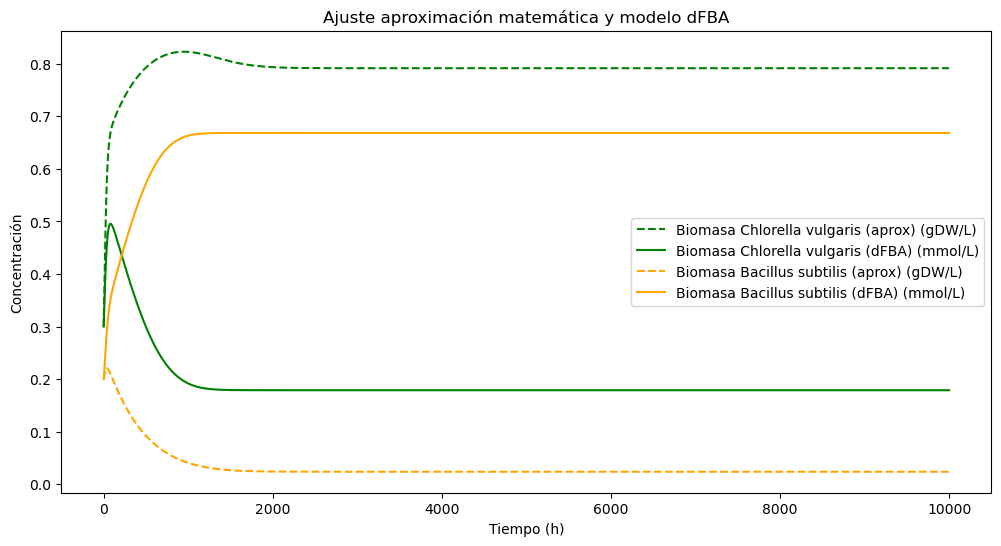

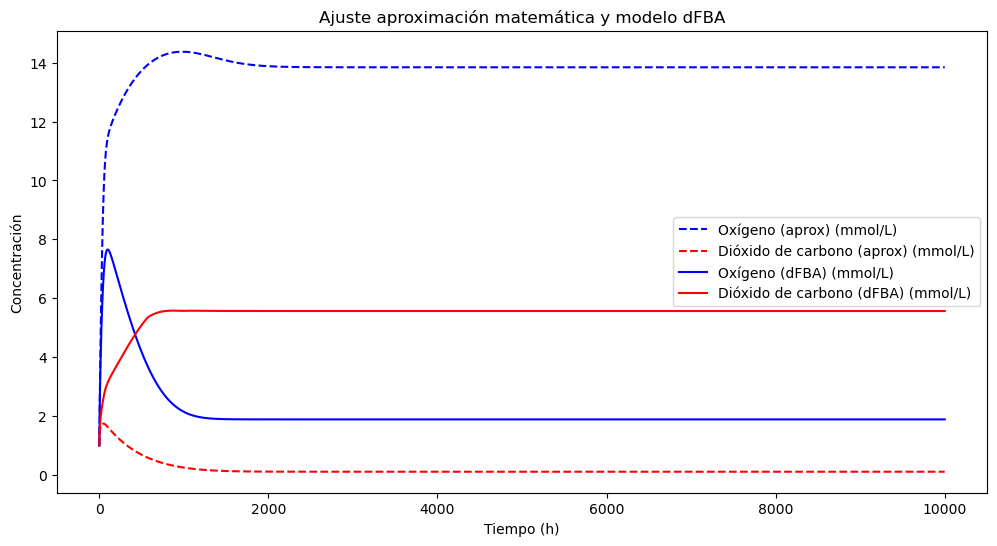

In [93]:
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[0], label='Biomasa Chlorella vulgaris (aprox) (gDW/L)', linestyle='--', color='green')
plt.plot(sol.t, chl_b, label='Biomasa Chlorella vulgaris (dFBA) (mmol/L)', color='green')
plt.plot(sol.t, sol.y[1], label='Biomasa Bacillus subtilis (aprox) (gDW/L)', linestyle='--', color='orange')
plt.plot(sol.t, bac_b, label='Biomasa Bacillus subtilis (dFBA) (mmol/L)', color='orange')

plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración')
plt.title('Ajuste aproximación matemática y modelo dFBA')
plt.legend()
plt.savefig('ajuste.png', dpi=300, bbox_inches='tight')
plt.show()
plt.figure(figsize=(12, 6))
plt.plot(sol.t, sol.y[2], label='Oxígeno (aprox) (mmol/L)', linestyle='--', color='blue')
plt.plot(sol.t, sol.y[3], label='Dióxido de carbono (aprox) (mmol/L)', linestyle='--', color='red')
plt.plot(sol.t, o2_c, label='Oxígeno (dFBA) (mmol/L)', color='blue')
plt.plot(sol.t, co2_c, label='Dióxido de carbono (dFBA) (mmol/L)', color='red')
plt.xlabel('Tiempo (h)')
plt.ylabel('Concentración')
plt.title('Ajuste aproximación matemática y modelo dFBA')
plt.legend()
plt.savefig('ajuste1.png', dpi=300, bbox_inches='tight')
plt.show()

#### Ajuste de prámetros

In [62]:
from scipy.integrate import odeint
from scipy.optimize import minimize
import numpy as np

# Datos reales (sacados del dFBA)
ts = np.linspace(0, 10000, 10000)
data_real = np.array([chl_b, bac_b, o2_c, co2_c])  # shape: (4, 1000)


In [63]:
def ode_model_con_restricciones(y, t, c1, c2,c3, c4, c5, c6, d_1, d_2):
    x1,x2,O2,CO2 = y
    d_1, d_2 = 0.008, 0.005 # Tasa de muerte (1/h)
    dx1_dt = c1*(CO2/(0.1+CO2))*x1*(1 - x1 - x2)- x1*d_1
    dx2_dt = c2*(O2/(1+O2))*x2*(1 - x1 - x2)- x2*d_2
    # ------------------
    # Dinámica del oxígeno: flujo específico * biomasa
    # ------------------
    dO2_dt = c3*x1 - c4*(O2/(1+O2))*x2*(1 - x1 - x2)  - 0.1*O2
    dCO2_dt= -c5*(CO2/(0.1+CO2))*x1*(1 - x1 - x2) + c6*x2  - 0.6*CO2 
    
    return [dx1_dt, dx2_dt, dO2_dt, dCO2_dt]

def error_con_restricciones(params, y0, ts, data_real, d_1, d_2):
    c1, c2, c3, c4, c5, c6 = params
    sol = odeint(ode_model_con_restricciones, y0, ts, args=(c1, c2, c3, c4, c5, c6, d_1, d_2))
    return np.mean((sol.T - data_real)**2)

# Nuevos parámetros iniciales (solo 4)
params0 = [0.0558/0.684, 0.05289/1.82, 1.7, 1.82, 0.684, 5.1] # c1, c2, c3, c6

# Minimización con restricciones
res = minimize(error_con_restricciones, params0, args=(y0, ts, data_real, d_1, d_2), method='Nelder-Mead')
print("Parámetros óptimos:")
print("c1 =", res.x[0])
print("c2 =", res.x[1])
print("c3 =", res.x[2])
print("c4 =", res.x[3])
print("c5 =", res.x[4])
print("c6 =", res.x[5])


/var/folders/_f/sfpn3qz53dzchbyzlfj53x940000gn/T/ipykernel_1191/2943346340.py:16: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  sol = odeint(ode_model_con_restricciones, y0, ts, args=(c1, c2, c3, c4, c5, c6, d_1, d_2))


 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.9491255055000D+02   r2 =  0.3943479231058D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.9491255055000D+02   r2 =  0.4352928367926D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.9491255055000D+02   r2 =  0.4352928367926D-14
 lsoda--  warning..internal t (=r1) and h (=r2) are  
       such that in the machine, t + h = t on the next step  
       (h = step size). solver will continue anyway  
      in above,  r1 =  0.9491255055000D+02   r2 =  0.4352928367926D-14
 lsoda--  warning..internal t (=r1) 

### Análisis de estabilidad del sistema

#### Puntos de equilibrio

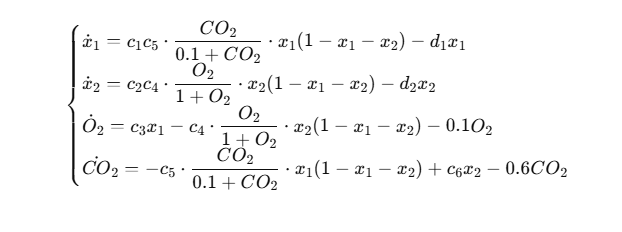

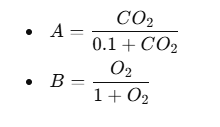

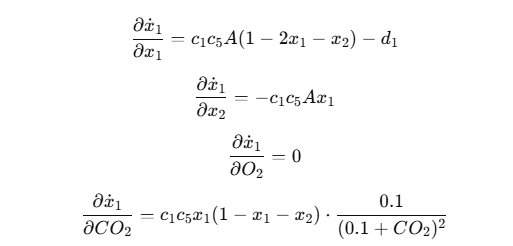

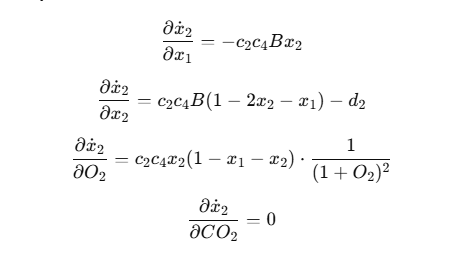

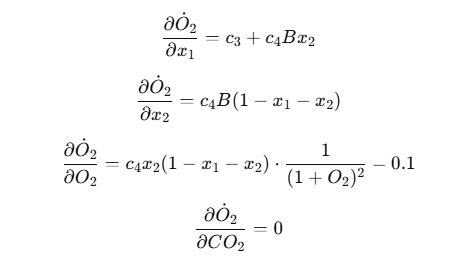

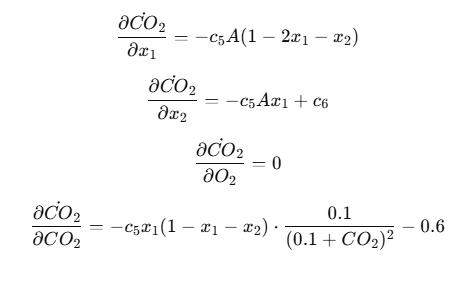

In [72]:
import numpy as np
import pandas as pd
from scipy.optimize import fsolve
from numpy.linalg import eigvals

# -------------------------
# PARÁMETROS DEL MODELO
# -------------------------
d_1, d_2 = 0.008, 0.005
c4 = 1.88
c5 = 0.684555
c1 = 0.05425 
c2 = 0.0515
c3 = 1.99
c6 = 5.06

# -------------------------
# SISTEMA EN EQUILIBRIO
# -------------------------
def sistema_equilibrio(y):
    x1, x2, O2, CO2 = y
    dx1 = c1 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) - d_1 * x1
    dx2 = c2 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - d_2 * x2
    dO2 = c3 * x1 - c4 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - 0.1 * O2
    dCO2 = -c5 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) + c6 * x2 - 0.6 * CO2
    return [dx1, dx2, dO2, dCO2]

# -------------------------
# JACOBIANO DERIVADO A MANO
# -------------------------
def jacobiano_manual(y):
    x1, x2, O2, CO2 = y
    A = CO2 / (0.1 + CO2)
    B = O2 / (1 + O2)
    dA_dCO2 = 0.1 / (0.1 + CO2)**2
    dB_dO2 = 1 / (1 + O2)**2

    J = np.zeros((4, 4))
    J[0, 0] = c1 * A * (1 - 2 * x1 - x2) - d_1
    J[0, 1] = -c1 * A * x1
    J[0, 2] = 0
    J[0, 3] = c1 * x1 * (1 - x1 - x2) * dA_dCO2

    J[1, 0] = -c2 * B * x2
    J[1, 1] = c2 * B * (1 - 2 * x2 - x1) - d_2
    J[1, 2] = c2 * x2 * (1 - x1 - x2) * dB_dO2
    J[1, 3] = 0

    J[2, 0] = c3 + c4 * B * x2
    J[2, 1] = c4 * B * (1 - x1 - x2)
    J[2, 2] = c4 * x2 * (1 - x1 - x2) * dB_dO2 - 0.1
    J[2, 3] = 0

    J[3, 0] = -c5 * A * (1 - 2 * x1 - x2)
    J[3, 1] = -c5 * A * x1 + c6
    J[3, 2] = 0
    J[3, 3] = -c5 * x1 * (1 - x1 - x2) * dA_dCO2 - 0.6

    return J

# -------------------------
# CONDICIONES INICIALES
# -------------------------
initial_conditions = [
    [0.3, 0.2, 1.0, 1.0],
    [0.7, 0.05, 2.0, 1.5],
    [0.05, 0.7, 1.5, 2.0],
    [0.1, 0.1, 0.5, 0.5],
    [0.4, 0.4, 3.0, 3.0],
    [0.6, 0.2, 1.2, 0.8],
    [0.2, 0.6, 0.8, 1.2],
    [0.005650, 0.0021, 0.10846, 0.017],
    [0.7871, 0.0431, 15.53,  0.2542],
    [0.7996, 0.0543, 15.77, 0.3540]
]

# -------------------------
# BÚSQUEDA REFINADA
# -------------------------
found_equilibria = []

for y0 in initial_conditions:
    try:
        sol, info, ier, msg = fsolve(sistema_equilibrio, y0, xtol=1e-12, maxfev=10000, full_output=True)
        residuo = np.linalg.norm(sistema_equilibrio(sol))
        rounded = tuple(np.round(sol, 5))
        if ier == 1 and residuo < 1e-8:
            if not any(np.allclose(rounded, eq, atol=1e-12) for eq in found_equilibria):
                found_equilibria.append(rounded)
    except:
        continue

# Añadir el equilibrio trivial si no está
trivial = (0.0, 0.0, 0.0, 0.0)
if not any(np.allclose(trivial, eq, atol=1e-12) for eq in found_equilibria):
    found_equilibria.append(trivial)

# -------------------------
# ESTABILIDAD DE CADA PUNTO
# -------------------------
estabilidades = []
for eq in found_equilibria:
    J = jacobiano_manual(eq)
    autovalores = eigvals(J)
    if np.all(np.real(autovalores) < 0):
        estabilidades.append("Estable")
    elif np.any(np.real(autovalores) > 0):
        estabilidades.append("Inestable")
    else:
        estabilidades.append("Saddle")

# -------------------------
# RESULTADOS
# -------------------------
df_result = pd.DataFrame(found_equilibria, columns=["x1", "x2", "O2", "CO2"])
df_result["Estabilidad"] = estabilidades
print("Puntos de equilibrio y su estabilidad:")
print(df_result)


Puntos de equilibrio y su estabilidad:
        x1       x2        O2      CO2 Estabilidad
0  0.91809 -0.02048  18.30730 -0.32716   Inestable
1  0.15588  0.69413   1.83500  5.82758     Estable
2  0.00565  0.00218   0.10847  0.01746   Inestable
3  0.00000  0.00000   0.00000  0.00000     Estable


In [73]:
# -------------------------
# MOSTRAR AUTORES DE CADA EQUILIBRIO
# -------------------------
print("\nAutovalores de cada equilibrio:\n")
for i, eq in enumerate(found_equilibria):
    J = jacobiano_manual(eq)
    autovalores = eigvals(J)
    print(f"Equilibrio {i+1}: {np.round(eq, 5)}")
    print(f"  Estabilidad: {estabilidades[i]}")
    print(f"  Autovalores: {np.round(autovalores, 5)}\n")



Autovalores de cada equilibrio:

Equilibrio 1: [ 0.91809 -0.02048 18.3073  -0.32716]
  Estabilidad: Inestable
  Autovalores: [-0.73657 -0.10001 -0.05962  0.00075]

Equilibrio 2: [0.15588 0.69413 1.835   5.82758]
  Estabilidad: Estable
  Autovalores: [-0.60005+0.j      -0.08165+0.j      -0.01273+0.00426j -0.01273-0.00426j]

Equilibrio 3: [0.00565 0.00218 0.10847 0.01746]
  Estabilidad: Inestable
  Autovalores: [-0.62747 -0.09645 -0.00607  0.00544]

Equilibrio 4: [0. 0. 0. 0.]
  Estabilidad: Estable
  Autovalores: [-0.1   -0.008 -0.6   -0.005]



El punto de equilibrio 2 y la solución trivial son nodos estables porque todos los autovalores son reales y negativos

#### Represenacion poblaciones y oxígeno 

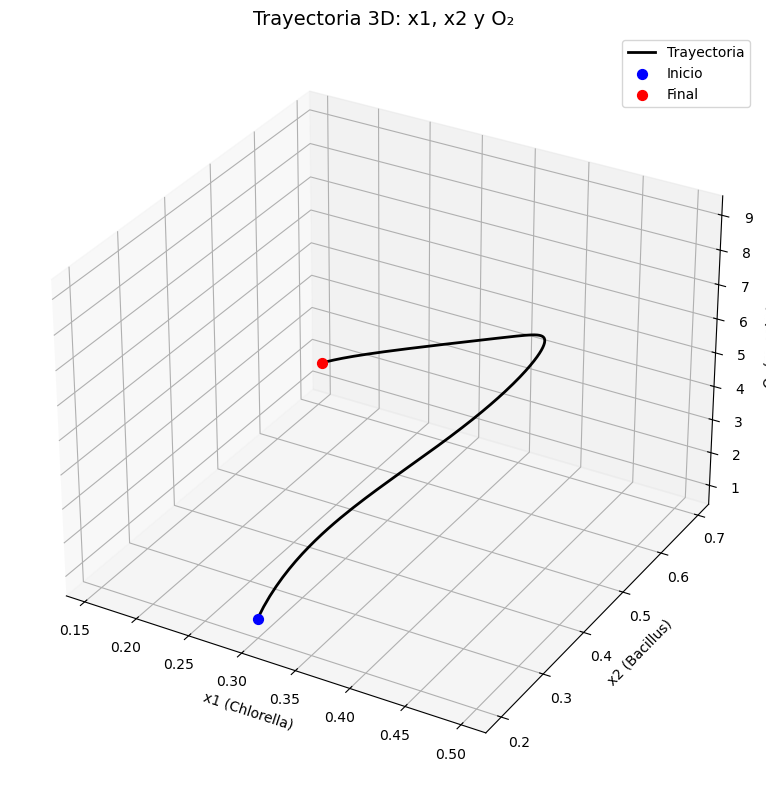

In [373]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# ---------- PARÁMETROS ----------
d_1, d_2 = 0.008, 0.005 # Tasa de muerte (1/h)
c4 = 1.88
c5 = 0.684555
c1 = 0.05425
c2 = 0.0515
c3 = 1.99
c6 = 5.06

# ---------- SISTEMA DINÁMICO ----------
def dynamic_system(t, y):
    x1, x2, O2, CO2 = y
    dx1_dt = c1 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) - x1 * d_1
    dx2_dt = c2 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - x2 * d_2
    dO2_dt = c3 * x1 - c4 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - 0.1 * O2
    dCO2_dt = -c5 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) + c6 * x2 - 0.6 * CO2
    return [dx1_dt, dx2_dt, dO2_dt, dCO2_dt]

# ---------- CONDICIÓN INICIAL ----------
y0 = [0.3, 0.2, 1, 1]

# ---------- SIMULACIÓN ----------
sol_3d = solve_ivp(
    dynamic_system,
    [0, 2000],
    y0,
    t_eval=np.linspace(0, 2000, 2000),
    rtol=1e-9,
    atol=1e-9
)

# Extraer x1, x2, O2
x1_3d = sol_3d.y[0]
x2_3d = sol_3d.y[1]
O2_3d = sol_3d.y[2]

# ---------- GRAFICAR TRAYECTORIA 3D ----------
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.set_title("Trayectoria 3D: x1, x2 y O₂", fontsize=14)
ax.set_xlabel("x1 (Chlorella)")
ax.set_ylabel("x2 (Bacillus)")
ax.set_zlabel("O₂ (mmol/L)")

# Trayectoria completa
ax.plot3D(x1_3d, x2_3d, O2_3d, color="black", lw=2, label="Trayectoria")

# Puntos de inicio y fin
ax.scatter(x1_3d[0], x2_3d[0], O2_3d[0], color="blue", s=50, label="Inicio")
ax.scatter(x1_3d[-1], x2_3d[-1], O2_3d[-1], color="red", s=50, label="Final")

ax.legend()
plt.tight_layout()
plt.show()


#### Animación del sistema dinámico mostrando variación de x1, x2, o2 y co2

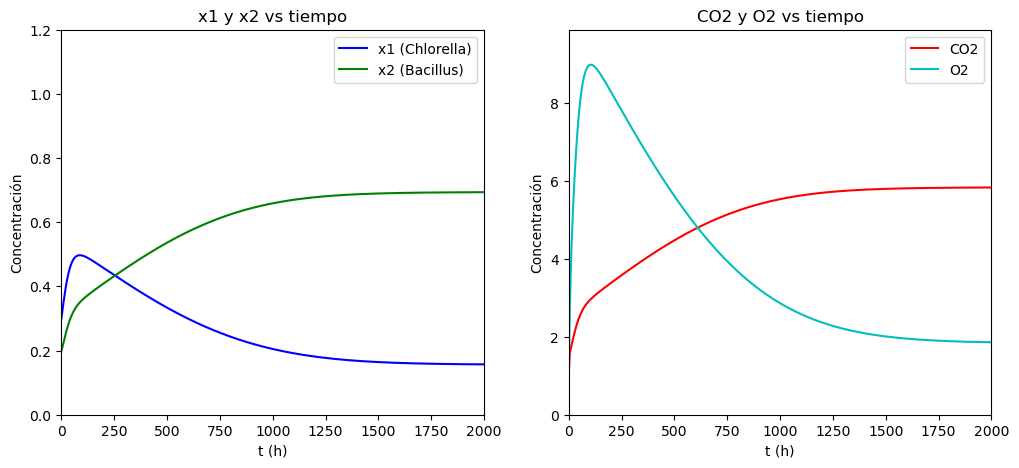

In [376]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.integrate import solve_ivp

# Parámetros
d_1, d_2 = 0.008, 0.005
c4 = 1.88
c5 = 0.684555
c1 = 0.05425
c2 = 0.0515
c3 = 1.99
c6 = 5.06

# Sistema dinámico
def dynamic_system(t, y):
    x1, x2, O2, CO2 = y
    dx1_dt = c1 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) - x1 * d_1
    dx2_dt = c2 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - x2 * d_2
    dO2_dt = c3 * x1 - c4 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - 0.1 * O2
    dCO2_dt = -c5 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) + c6 * x2 - 0.6 * CO2
    return [dx1_dt, dx2_dt, dO2_dt, dCO2_dt]

# Simulación
y0 = [0.3, 0.2, 1.0, 1.0]
t_eval = np.linspace(0, 2000, 400)
sol = solve_ivp(dynamic_system, [0, 2000], y0, t_eval=t_eval, rtol=1e-9, atol=1e-9)

# Crear figura
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
ax1, ax2 = axs

# Líneas vacías
line1, = ax1.plot([], [], 'b-', label='x1 (Chlorella)')
line2, = ax1.plot([], [], 'g-', label='x2 (Bacillus)')
line3, = ax2.plot([], [], 'r-', label='CO2')
line4, = ax2.plot([], [], 'c-', label='O2')

# Configurar ejes
ax1.set_xlim(0, 2000)
ax1.set_ylim(0, 1.2)
ax1.set_title("x1 y x2 vs tiempo")
ax1.set_xlabel("t (h)")
ax1.set_ylabel("Concentración")
ax1.legend()

ax2.set_xlim(0, 2000)
ax2.set_ylim(0, max(np.max(sol.y[2]), np.max(sol.y[3])) * 1.1)
ax2.set_title("CO2 y O2 vs tiempo")
ax2.set_xlabel("t (h)")
ax2.set_ylabel("Concentración")
ax2.legend()

# Función de actualización
def update(frame):
    line1.set_data(t_eval[:frame], sol.y[0, :frame])
    line2.set_data(t_eval[:frame], sol.y[1, :frame])
    line3.set_data(t_eval[:frame], sol.y[3, :frame])
    line4.set_data(t_eval[:frame], sol.y[2, :frame])
    return line1, line2, line3, line4

# Crear animación
ani = FuncAnimation(fig, update, frames=len(t_eval), interval=50, blit=True)

# Guardar como gif
ani.save("sistema_animacion.gif", writer=PillowWriter(fps=20))


## Análisis de estabilidad en función de las tasas de extracción de O2 y CO2

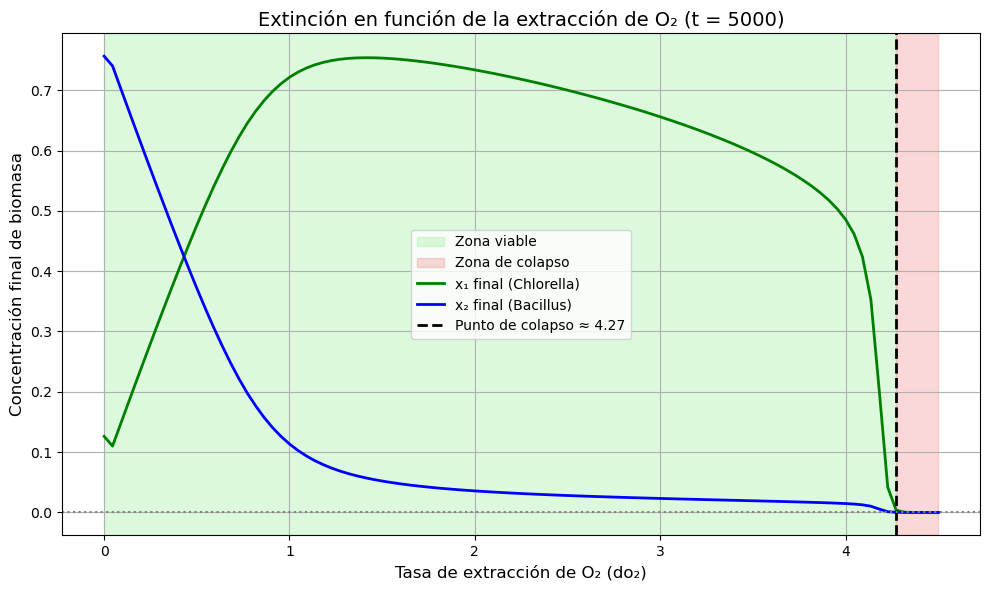

In [97]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -------------------------
# PARÁMETROS DEL MODELO
# -------------------------
# Condiciones iniciales
y0 = [0.3, 0.3, 1.0, 1.0]  # x1, x2, O2, CO2
t_span_long = (0, 5000)
t_eval_long = np.linspace(*t_span_long, 10000)

# Parámetros del sistema
d_1, d_2 = 0.008, 0.005
c1, c2, c3, c4 = 0.05425, 0.0515, 1.99, 1.88
c5, c6 = 0.684555, 5.06
dco2 = 0.6  # extracción de CO2 fija

# -------------------------
# SISTEMA DINÁMICO MODIFICADO
# -------------------------
def dynamic_system_param(t, y, do2, dco2):
    x1, x2, O2, CO2 = y
    dx1 = c1 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) - d_1 * x1
    dx2 = c2 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - d_2 * x2
    dO2 = c3 * x1 - c4 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - do2 * O2
    dCO2 = -c5 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) + c6 * x2 - dco2 * CO2
    return [dx1, dx2, dO2, dCO2]

# -------------------------
# ANÁLISIS EXTENDIDO DE TIPPING POINT
# -------------------------
do2_vals_ext = np.linspace(0, 4.5, 100)
x1_final_long = []
x2_final_long = []

for val in do2_vals_ext:
    sol = solve_ivp(dynamic_system_param, t_span_long, y0, args=(val, dco2), t_eval=[t_eval_long[-1]], method='BDF')
    x1_final_long.append(sol.y[0, -1])
    x2_final_long.append(sol.y[1, -1])

# -------------------------
# DETECCIÓN DEL TIPPING POINT
# -------------------------
tipping_index = None
for i in range(len(do2_vals_ext)):
    if x1_final_long[i] < 1e-3 or x2_final_long[i] < 1e-3:
        tipping_index = i
        break
tipping_point = do2_vals_ext[tipping_index] if tipping_index is not None else None

# -------------------------
# GRÁFICO EMBELLECIDO
# -------------------------
plt.figure(figsize=(10, 6))

# Colorear zonas
plt.axvspan(do2_vals_ext[0], tipping_point, color='lightgreen', alpha=0.3, label='Zona viable')
plt.axvspan(tipping_point, do2_vals_ext[-1], color='lightcoral', alpha=0.3, label='Zona de colapso')

# Curvas de biomasa
plt.plot(do2_vals_ext, x1_final_long, label='x₁ final (Chlorella)', color='green', linewidth=2)
plt.plot(do2_vals_ext, x2_final_long, label='x₂ final (Bacillus)', color='blue', linewidth=2)

# Línea de tipping point
plt.axvline(tipping_point, color='black', linestyle='--', linewidth=2, label=f'Punto de colapso ≈ {tipping_point:.2f}')

# Estética general
plt.axhline(0, color='gray', linestyle=':')
plt.xlabel('Tasa de extracción de O₂ (do₂)', fontsize=12)
plt.ylabel('Concentración final de biomasa', fontsize=12)
plt.title('Extinción en función de la extracción de O₂ (t = 5000)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('tipping_point.png', dpi=300, bbox_inches='tight')
plt.show()


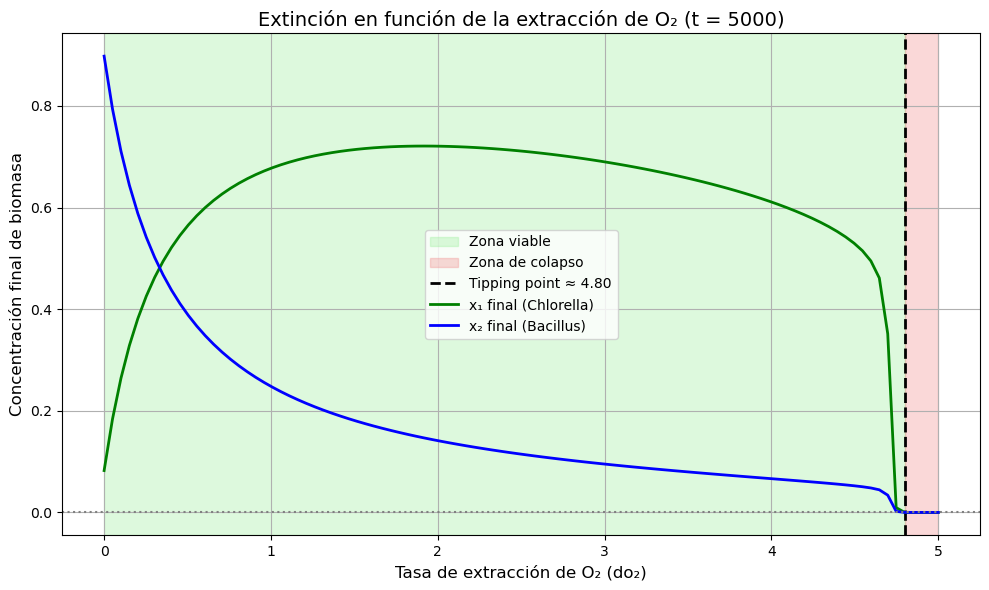

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -------------------------
# PARÁMETROS DEL MODELO
# -------------------------
# Condiciones iniciales
y0 = [0.3, 0.3, 1.0, 1.0]  # x1, x2, O2, CO2
t_span_long = (0, 5000)
t_eval_long = np.linspace(*t_span_long, 10000)

# Parámetros del sistema
d_1, d_2 = 0.008, 0.005
c1, c2, c3, c4 = 0.05425, 0.0515, 1.99, 1.88
c5, c6 = 0.684555, 5.06
dco2 = 0.6  # extracción de CO2 fija

# -------------------------
# SISTEMA DINÁMICO MODIFICADO
# -------------------------
def dynamic_system_param(t, y, do2, dco2):
    x1, x2, O2, CO2 = y
    dx1 = c1 * CO2 * x1 * (1 - x1 - x2) - d_1 * x1
    dx2 = c2 * O2 * x2 * (1 - x1 - x2) - d_2 * x2
    dO2 = c3 * x1 - c4 * O2 * x2 * (1 - x1 - x2) - do2 * O2
    dCO2 = -c5 * CO2 * x1 * (1 - x1 - x2) + c6 * x2 - dco2 * CO2
    return [dx1, dx2, dO2, dCO2]

# -------------------------
# ANÁLISIS EXTENDIDO DE TIPPING POINT
# -------------------------
do2_vals_ext = np.linspace(0, 5, 100)
x1_final_long = []
x2_final_long = []

for val in do2_vals_ext:
    sol = solve_ivp(dynamic_system_param, t_span_long, y0, args=(val, dco2), t_eval=[t_eval_long[-1]], method='BDF')
    x1_final_long.append(sol.y[0, -1])
    x2_final_long.append(sol.y[1, -1])

# -------------------------
# DETECCIÓN DEL TIPPING POINT
# -------------------------
tipping_index = None
for i in range(len(do2_vals_ext)):
    if x1_final_long[i] < 1e-3 or x2_final_long[i] < 1e-3:
        tipping_index = i
        break
tipping_point = do2_vals_ext[tipping_index] if tipping_index is not None else None

# -------------------------
# GRÁFICO EMBELLECIDO
# -------------------------
plt.figure(figsize=(10, 6))

# Colorear zonas
if tipping_point is not None:
    plt.axvspan(do2_vals_ext[0], tipping_point, color='lightgreen', alpha=0.3, label='Zona viable')
    plt.axvspan(tipping_point, do2_vals_ext[-1], color='lightcoral', alpha=0.3, label='Zona de colapso')
    plt.axvline(tipping_point, color='black', linestyle='--', linewidth=2, label=f'Tipping point ≈ {tipping_point:.2f}')
else:
    plt.axvspan(do2_vals_ext[0], do2_vals_ext[-1], color='lightgreen', alpha=0.3, label='Zona viable (sin colapso)')

# Curvas de biomasa
plt.plot(do2_vals_ext, x1_final_long, label='x₁ final (Chlorella)', color='green', linewidth=2)
plt.plot(do2_vals_ext, x2_final_long, label='x₂ final (Bacillus)', color='blue', linewidth=2)

# Estética general
plt.axhline(0, color='gray', linestyle=':')
plt.xlabel('Tasa de extracción de O₂ (do₂)', fontsize=12)
plt.ylabel('Concentración final de biomasa', fontsize=12)
plt.title('Extinción en función de la extracción de O₂ (t = 5000)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


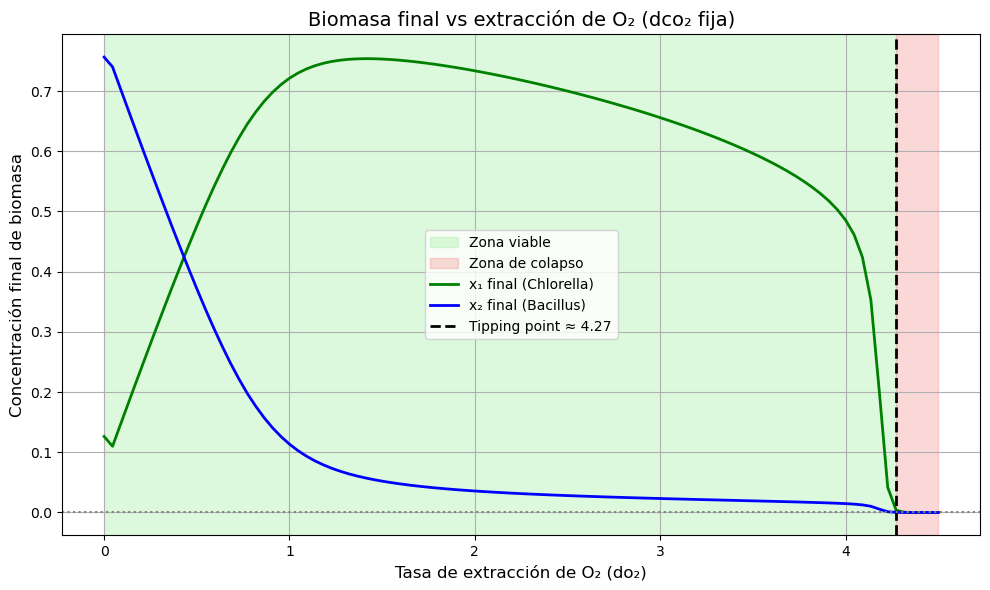

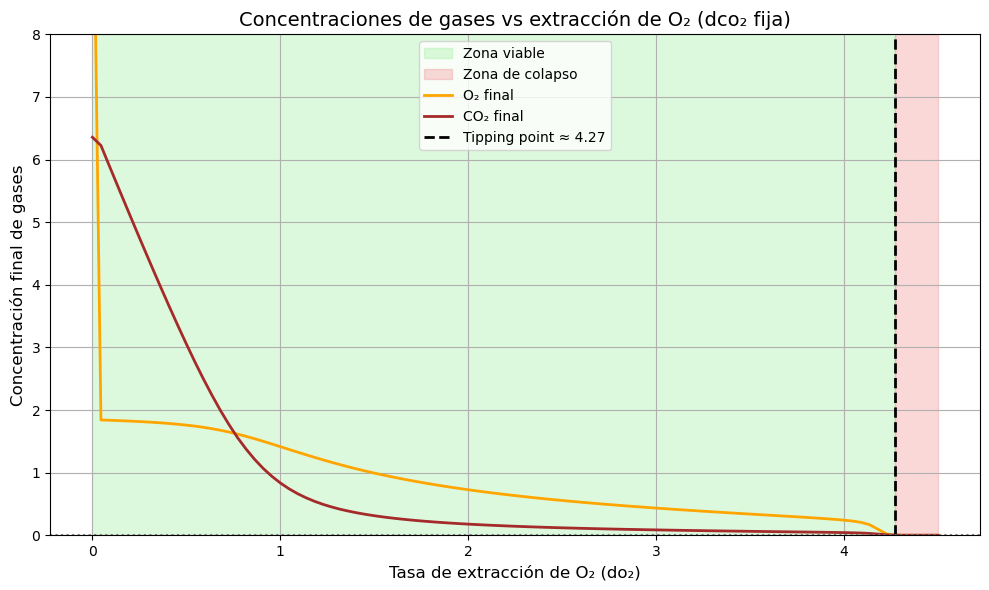

In [213]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -------------------------
# PARÁMETROS Y CONDICIONES
# -------------------------
y0 = [0.3, 0.3, 1.0, 1.0]  # x1, x2, O2, CO2
t_sim = 5000
d_1, d_2 = 0.008, 0.005
c1, c2, c3, c4 = 0.05425, 0.0515, 1.99, 1.88
c5, c6 = 0.684555, 5.06
dco2_fixed = 0.6

# -------------------------
# SISTEMA DINÁMICO MODIFICADO
# -------------------------
def dynamic_system_param(t, y, do2, dco2):
    x1, x2, O2, CO2 = y
    dx1 = c1 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) - d_1 * x1
    dx2 = c2 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - d_2 * x2
    dO2 = c3 * x1 - c4 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - do2 * O2
    dCO2 = -c5 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) + c6 * x2 - dco2 * CO2
    return [dx1, dx2, dO2, dCO2]

# -------------------------
# BARRIDO DE VALORES DE do2
# -------------------------
do2_vals = np.linspace(0, 4.5, 100)
x1_final, x2_final, o2_final, co2_final = [], [], [], []

for do2 in do2_vals:
    sol = solve_ivp(dynamic_system_param, (0, t_sim), y0, args=(do2, dco2_fixed), t_eval=[t_sim], method='BDF')
    x1_final.append(sol.y[0, -1])
    x2_final.append(sol.y[1, -1])
    o2_final.append(sol.y[2, -1])
    co2_final.append(sol.y[3, -1])

# -------------------------
# DETECCIÓN DEL TIPPING POINT
# -------------------------
threshold = 1e-3
tipping_index = next((i for i, (x1, x2) in enumerate(zip(x1_final, x2_final)) if x1 < threshold or x2 < threshold), None)
tipping_point = do2_vals[tipping_index] if tipping_index is not None else None

# -------------------------
# GRÁFICA 1: Biomasa vs do2
# -------------------------
plt.figure(figsize=(10, 6))
plt.axvspan(do2_vals[0], tipping_point, color='lightgreen', alpha=0.3, label='Zona viable')
plt.axvspan(tipping_point, do2_vals[-1], color='lightcoral', alpha=0.3, label='Zona de colapso')
plt.plot(do2_vals, x1_final, label='x₁ final (Chlorella)', color='green', linewidth=2)
plt.plot(do2_vals, x2_final, label='x₂ final (Bacillus)', color='blue', linewidth=2)
plt.axvline(tipping_point, color='black', linestyle='--', linewidth=2, label=f'Tipping point ≈ {tipping_point:.2f}')
plt.axhline(0, color='gray', linestyle=':')
plt.xlabel('Tasa de extracción de O₂ (do₂)', fontsize=12)
plt.ylabel('Concentración final de biomasa', fontsize=12)
plt.title('Biomasa final vs extracción de O₂ (dco₂ fija)', fontsize=14)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# -------------------------
# GRÁFICA 2: Gases vs do2
# -------------------------
plt.figure(figsize=(10, 6))
plt.axvspan(do2_vals[0], tipping_point, color='lightgreen', alpha=0.3, label='Zona viable')
plt.axvspan(tipping_point, do2_vals[-1], color='lightcoral', alpha=0.3, label='Zona de colapso')
plt.plot(do2_vals, o2_final, label='O₂ final', color='orange', linewidth=2)
plt.plot(do2_vals, co2_final, label='CO₂ final', color='brown', linewidth=2)
plt.axvline(tipping_point, color='black', linestyle='--', linewidth=2, label=f'Tipping point ≈ {tipping_point:.2f}')
plt.axhline(0, color='gray', linestyle=':')
plt.xlabel('Tasa de extracción de O₂ (do₂)', fontsize=12)
plt.ylabel('Concentración final de gases', fontsize=12)
plt.title('Concentraciones de gases vs extracción de O₂ (dco₂ fija)', fontsize=14)
plt.ylim(0, 8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


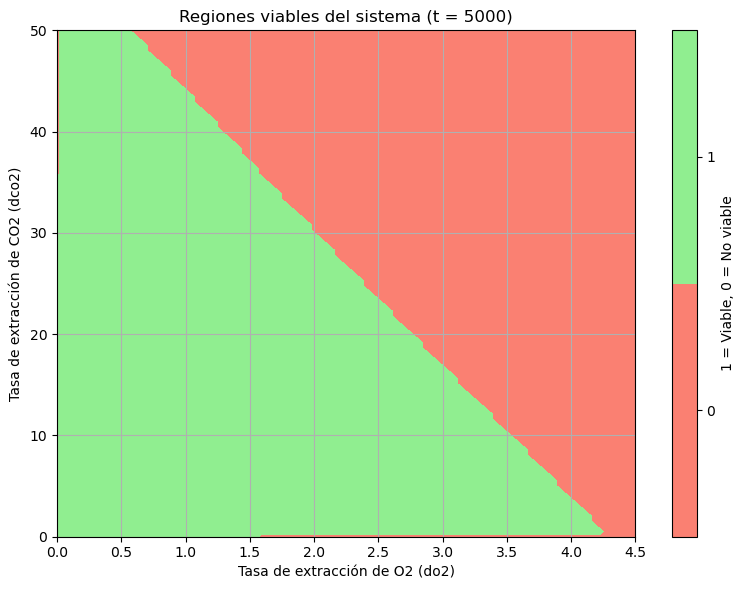

In [265]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# -------------------------
# PARÁMETROS Y CONDICIONES
# -------------------------
# Condiciones iniciales
y0 = [0.3, 0.3, 1.0, 1.0]
t_sim = 5000

# Parámetros del sistema
d_1, d_2 = 0.008, 0.005
c1, c2, c3, c4 = 0.05425, 0.0515, 1.99, 1.88
c5, c6 = 0.684555, 5.06

# -------------------------
# SISTEMA MODIFICADO
# -------------------------
def dynamic_system_param(t, y, do2, dco2):
    x1, x2, O2, CO2 = y
    dx1 = c1 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) - d_1 * x1
    dx2 = c2 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - d_2 * x2
    dO2 = c3 * x1 - c4 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - do2 * O2
    dCO2 = -c5 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) + c6 * x2 - dco2 * CO2
    return [dx1, dx2, dO2, dCO2]

# -------------------------
# BARRIDO DE do2 Y dco2
# -------------------------
do2_vals = np.linspace(0, 4.5, 100)
dco2_vals = np.linspace(0, 50, 100)
DO2, DCO2 = np.meshgrid(do2_vals, dco2_vals)
viable_mask = np.zeros_like(DO2, dtype=bool)

for i in range(DO2.shape[0]):
    for j in range(DO2.shape[1]):
        do2 = DO2[i, j]
        dco2 = DCO2[i, j]
        sol = solve_ivp(dynamic_system_param, (0, t_sim), y0, args=(do2, dco2), t_eval=[t_sim], method='BDF')
        x1_f = sol.y[0, -1]
        x2_f = sol.y[1, -1]
        if x1_f > 1e-3 and x2_f > 1e-3:
            viable_mask[i, j] = True

# -------------------------
# GRÁFICO DE VIABILIDAD
# -------------------------
plt.figure(figsize=(8, 6))
plt.contourf(DO2, DCO2, viable_mask, levels=[-0.5, 0.5, 1.5], colors=['salmon', 'lightgreen'])
plt.xlabel('Tasa de extracción de O2 (do2)')
plt.ylabel('Tasa de extracción de CO2 (dco2)')
plt.title(f'Regiones viables del sistema (t = {t_sim})')
plt.colorbar(label='1 = Viable, 0 = No viable', ticks=[0, 1])
plt.grid(True)
plt.tight_layout()
plt.show()


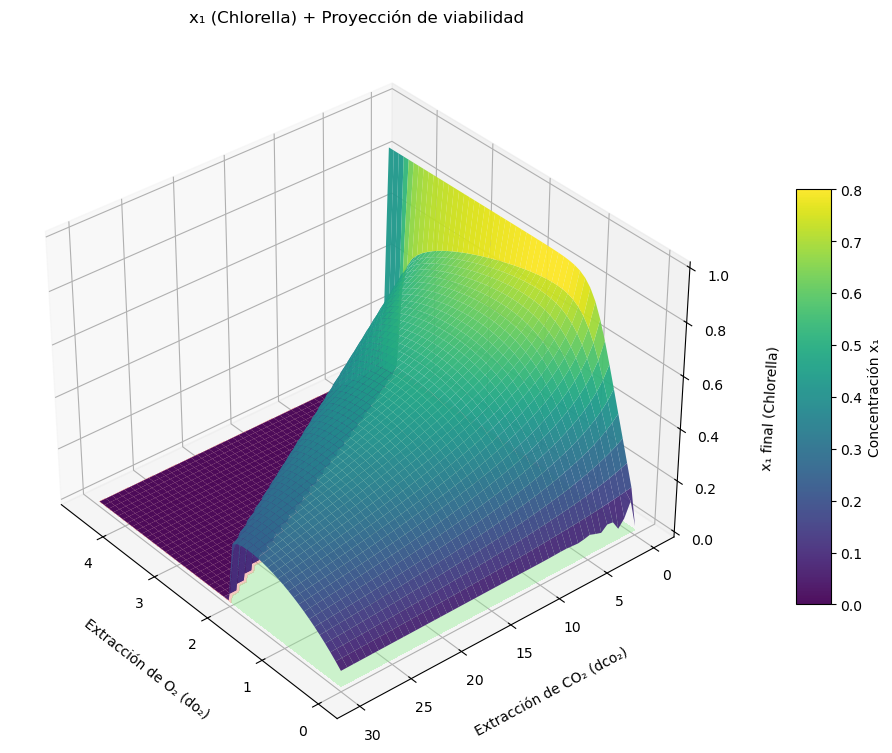

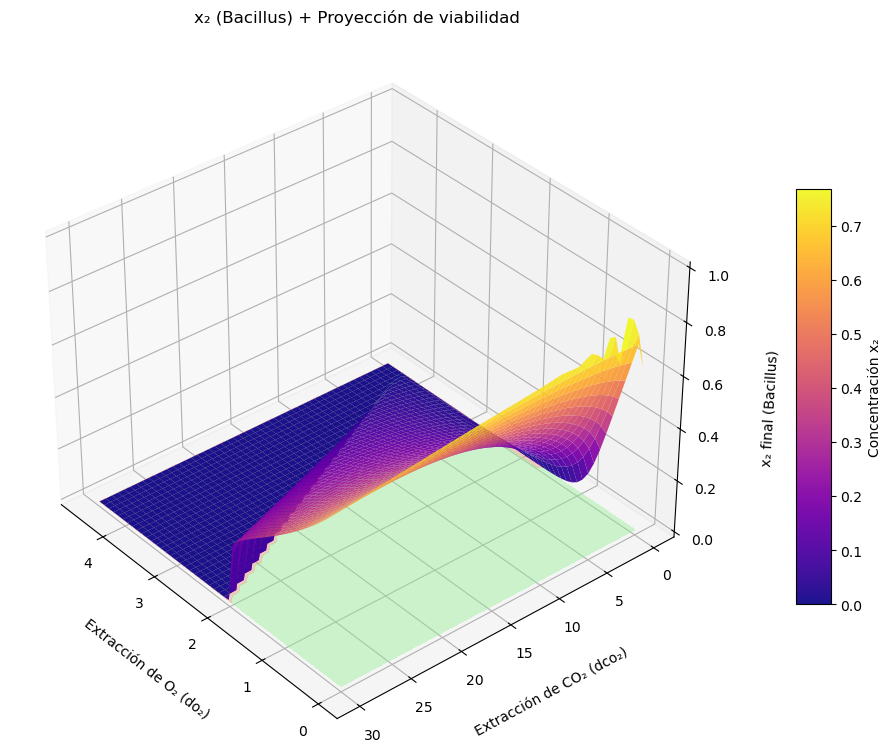

In [225]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from mpl_toolkits.mplot3d import Axes3D

# -------------------------
# PARÁMETROS Y CONDICIONES
# -------------------------
y0 = [0.3, 0.3, 1.0, 1.0]
t_sim = 5000
d_1, d_2 = 0.008, 0.005
c1, c2, c3, c4 = 0.05425, 0.0515, 1.99, 1.88
c5, c6 = 0.684555, 5.06

# -------------------------
# SISTEMA MODIFICADO
# -------------------------
def dynamic_system_param(t, y, do2, dco2):
    x1, x2, O2, CO2 = y
    dx1 = c1 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) - d_1 * x1
    dx2 = c2 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - d_2 * x2
    dO2 = c3 * x1 - c4 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - do2 * O2
    dCO2 = -c5 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) + c6 * x2 - dco2 * CO2
    return [dx1, dx2, dO2, dCO2]

# -------------------------
# MALLA Y SIMULACIÓN
# -------------------------
do2_vals = np.linspace(0, 4.5, 50)
dco2_vals = np.linspace(0, 30, 50)
DO2, DCO2 = np.meshgrid(do2_vals, dco2_vals)

x1_surface = np.zeros_like(DO2)
x2_surface = np.zeros_like(DCO2)
viable_mask = np.zeros_like(DO2, dtype=bool)

for i in range(DO2.shape[0]):
    for j in range(DO2.shape[1]):
        do2 = DO2[i, j]
        dco2 = DCO2[i, j]
        sol = solve_ivp(dynamic_system_param, (0, t_sim), y0, args=(do2, dco2), t_eval=[t_sim], method='BDF')
        x1_f = sol.y[0, -1]
        x2_f = sol.y[1, -1]
        x1_surface[i, j] = x1_f
        x2_surface[i, j] = x2_f
        if x1_f > 1e-3 and x2_f > 1e-3:
            viable_mask[i, j] = True

# -------------------------
# PROYECCIONES AJUSTADAS
# -------------------------
offset_x1 = np.percentile(x1_surface, 2)
offset_x2 = np.percentile(x2_surface, 2)

# -------------------------
# GRÁFICO 3D x1 + PROYECCIÓN
# -------------------------
fig1 = plt.figure(figsize=(12, 9))
ax1 = fig1.add_subplot(111, projection='3d')
surf1 = ax1.plot_surface(DO2, DCO2, x1_surface, cmap='viridis', edgecolor='none', alpha=0.95)
ax1.contourf(DO2, DCO2, viable_mask, zdir='z', offset=offset_x1,
             levels=[-0.5, 0.5, 1.5], colors=['salmon', 'lightgreen'], alpha=0.4)
ax1.set_xlabel('Extracción de O₂ (do₂)', labelpad=15)
ax1.set_ylabel('Extracción de CO₂ (dco₂)', labelpad=15)
ax1.set_zlabel('x₁ final (Chlorella)', labelpad=15)
ax1.set_title('x₁ (Chlorella) + Proyección de viabilidad', pad=20)
fig1.colorbar(surf1, ax=ax1, shrink=0.6, aspect=12, pad=0.1, label='Concentración x₁')
ax1.view_init(elev=35, azim=140)

# -------------------------
# GRÁFICO 3D x2 + PROYECCIÓN
# -------------------------
fig2 = plt.figure(figsize=(12, 9))
ax2 = fig2.add_subplot(111, projection='3d')
surf2 = ax2.plot_surface(DO2, DCO2, x2_surface, cmap='plasma', edgecolor='none', alpha=0.95)
ax2.contourf(DO2, DCO2, viable_mask, zdir='z', offset=offset_x2,
             levels=[-0.5, 0.5, 1.5], colors=['salmon', 'lightgreen'], alpha=0.4)
ax2.set_xlabel('Extracción de O₂ (do₂)', labelpad=15)
ax2.set_ylabel('Extracción de CO₂ (dco₂)', labelpad=15)
ax2.set_zlabel('x₂ final (Bacillus)', labelpad=15)
ax2.set_title('x₂ (Bacillus) + Proyección de viabilidad', pad=20)
fig2.colorbar(surf2, ax=ax2, shrink=0.6, aspect=12, pad=0.1, label='Concentración x₂')
ax2.view_init(elev=35, azim=140)

plt.show()



## Evalaución de las cuencas de atracción de los dos puntos de equilibrio estables: coexistencia o extinción

##### Concentraciones inciales de x1 y X2

In [116]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Parámetros
d_1, d_2 = 0.008, 0.005
c4 = 1.88
c5 = 0.684555
c1 = 0.05425
c2 = 0.0515
c3 = 1.99
c6 = 5.06

# Sistema de ecuaciones
def hiperciclo(t, y):
    x1, x2, O2, CO2 = y
    dx1 = c1 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) - x1 * d_1
    dx2 = c2 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - x2 * d_2
    dO2 = c3 * x1 - c4 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - 0.1 * O2
    dCO2 = -c5 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) + c6 * x2 - 0.6 * CO2
    return [dx1, dx2, dO2, dCO2]


In [127]:
# Rango de condiciones iniciales para x1 y x2
x_vals = np.linspace(0, 0.01, 100)
y_vals = np.linspace(0, 0.01, 100)

# Matriz para guardar si sobrevive o no (0: muere, 1: sobrevive)
supervivencia = np.zeros((len(x_vals), len(y_vals)))
biomasa_x1 = np.zeros_like(supervivencia)
biomasa_x2 = np.zeros_like(supervivencia)

# Condiciones iniciales fijas de gases
O2_0 = 1.0
CO2_0 = 1.0

# Tiempo de simulación
t_span = (0, 5000)
t_eval = np.linspace(*t_span, 1000)

# Simulaciones
for i, x1_0 in enumerate(x_vals):
    for j, x2_0 in enumerate(y_vals):
        sol = solve_ivp(hiperciclo, t_span, [x1_0, x2_0, O2_0, CO2_0], t_eval=t_eval, method='BDF')
        x1_final, x2_final = sol.y[0, -1], sol.y[1, -1]

        # Consideramos que "muere" si x1 y x2 tienden a cero
        if x1_final < 0.01 and x2_final < 0.01:
            supervivencia[i, j] = 0
        else:
            supervivencia[i, j] = 1
        
        biomasa_x1[i, j] = x1_final
        biomasa_x2[i, j] = x2_final


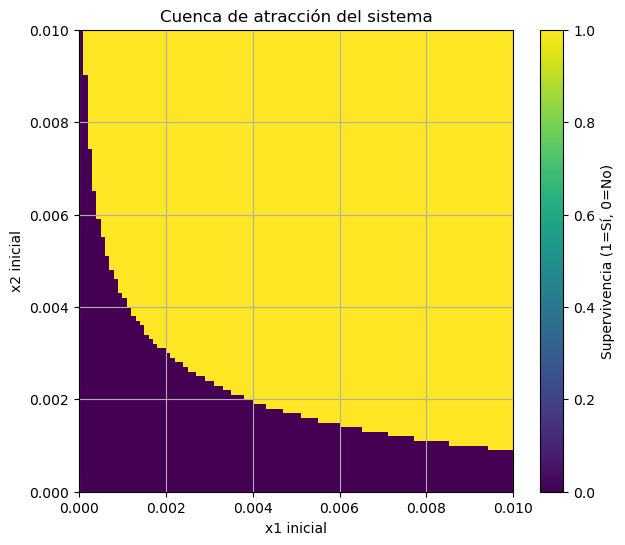

In [216]:
plt.figure(figsize=(7, 6))
plt.imshow(supervivencia.T, origin='lower', extent=(0, 0.01, 0, 0.01), cmap='viridis', aspect='auto')
plt.colorbar(label='Supervivencia (1=Sí, 0=No)')
plt.xlabel('x1 inicial')
plt.ylabel('x2 inicial')
plt.title('Cuenca de atracción del sistema')
plt.grid(True)
plt.show()



## Análisis de resistencia a perturbaciones

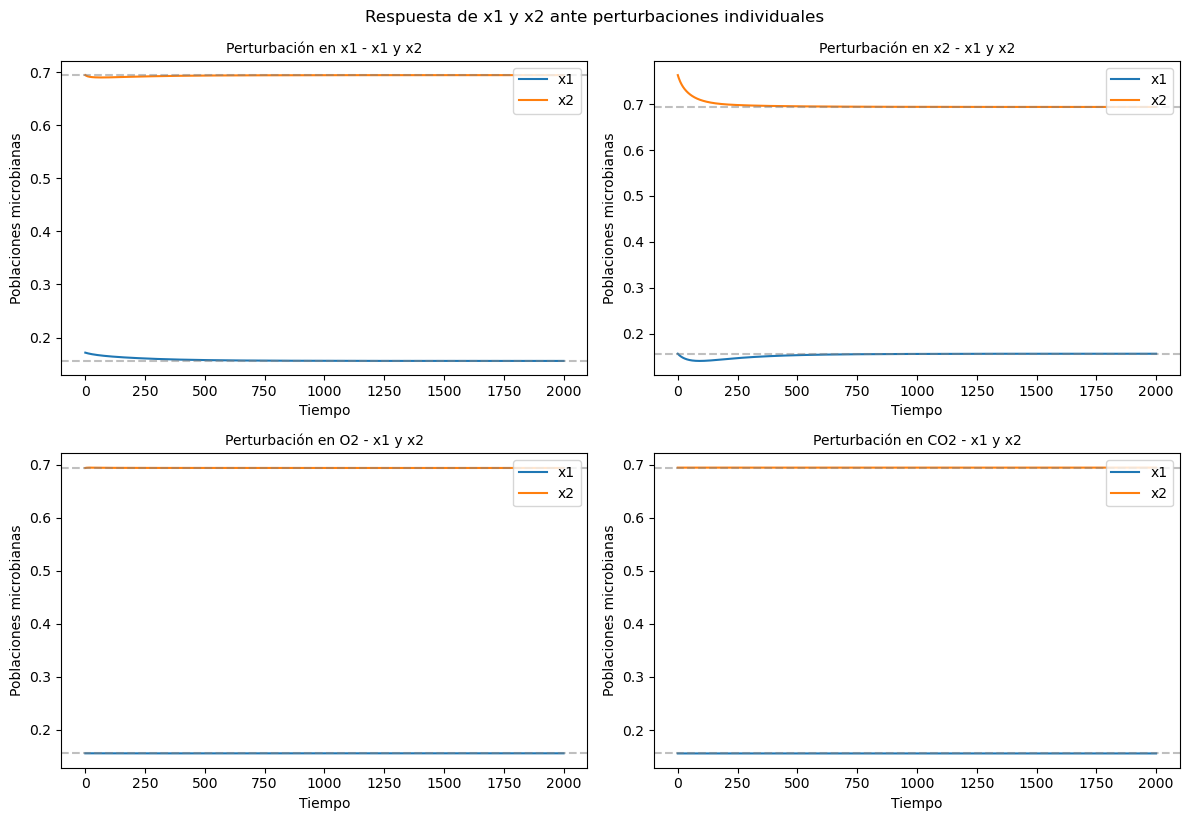

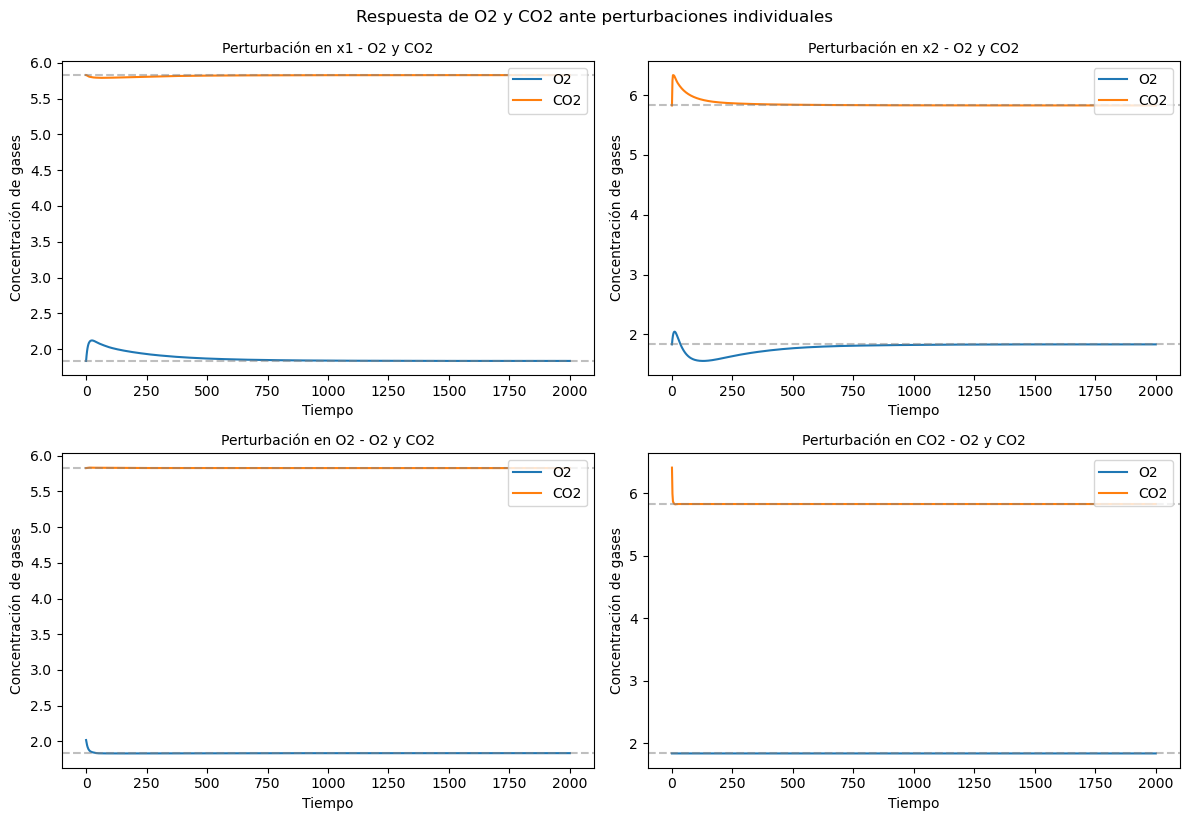

In [154]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
d_1, d_2 = 0.008, 0.005
c1 = 0.05425 
c2 = 0.0515
c3 = 1.99
c4 = 1.88
c5 = 0.684555
c6 = 5.06

# Sistema dinámico
def sistema(t, y):
    x1, x2, O2, CO2 = y
    dx1 = c1 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) - d_1 * x1
    dx2 = c2 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - d_2 * x2
    dO2 = c3 * x1 - c4 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - 0.1 * O2
    dCO2 = -c5 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) + c6 * x2 - 0.6 * CO2
    return [dx1, dx2, dO2, dCO2]

# Punto de equilibrio estimado (ajusta si lo tienes más preciso)
x1_eq, x2_eq, O2_eq, CO2_eq = 0.15588, 0.69413, 1.83500, 5.82758
equilibrio = np.array([x1_eq, x2_eq, O2_eq, CO2_eq])

# Perturbaciones del 1%
perturbaciones = np.eye(4) * 0.1 * equilibrio
labels = ['x1', 'x2', 'O2', 'CO2']

# Simulación temporal
t_span = (0, 2000)
t_eval = np.linspace(*t_span, 1000)

# Gráfico 1: x1 y x2
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for i in range(4):
    y0 = equilibrio.copy()
    y0[i] += perturbaciones[i, i]

    sol = solve_ivp(sistema, t_span, y0, t_eval=t_eval, method='BDF')

    axs[i].plot(sol.t, sol.y[0], label='x1')
    axs[i].plot(sol.t, sol.y[1], label='x2')
    axs[i].axhline(equilibrio[0], ls='--', color='gray', alpha=0.5)
    axs[i].axhline(equilibrio[1], ls='--', color='gray', alpha=0.5)
    axs[i].set_ylabel("Poblaciones microbianas")
    axs[i].set_xlabel("Tiempo")
    axs[i].legend(loc="upper right")
    axs[i].set_title(f"Perturbación en {labels[i]} - x1 y x2", fontsize=10)

plt.tight_layout()
plt.suptitle("Respuesta de x1 y x2 ante perturbaciones individuales", y=1.02)
plt.show()

# Gráfico 2: O2 y CO2
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for i in range(4):
    y0 = equilibrio.copy()
    y0[i] += perturbaciones[i, i]

    sol = solve_ivp(sistema, t_span, y0, t_eval=t_eval, method='BDF')

    axs[i].plot(sol.t, sol.y[2], label='O2')
    axs[i].plot(sol.t, sol.y[3], label='CO2')
    axs[i].axhline(equilibrio[2], ls='--', color='gray', alpha=0.5)
    axs[i].axhline(equilibrio[3], ls='--', color='gray', alpha=0.5)
    axs[i].set_ylabel("Concentración de gases")
    axs[i].set_xlabel("Tiempo")
    axs[i].legend(loc="upper right")
    axs[i].set_title(f"Perturbación en {labels[i]} - O2 y CO2", fontsize=10)

plt.tight_layout()
plt.suptitle("Respuesta de O2 y CO2 ante perturbaciones individuales", y=1.02)
plt.show()


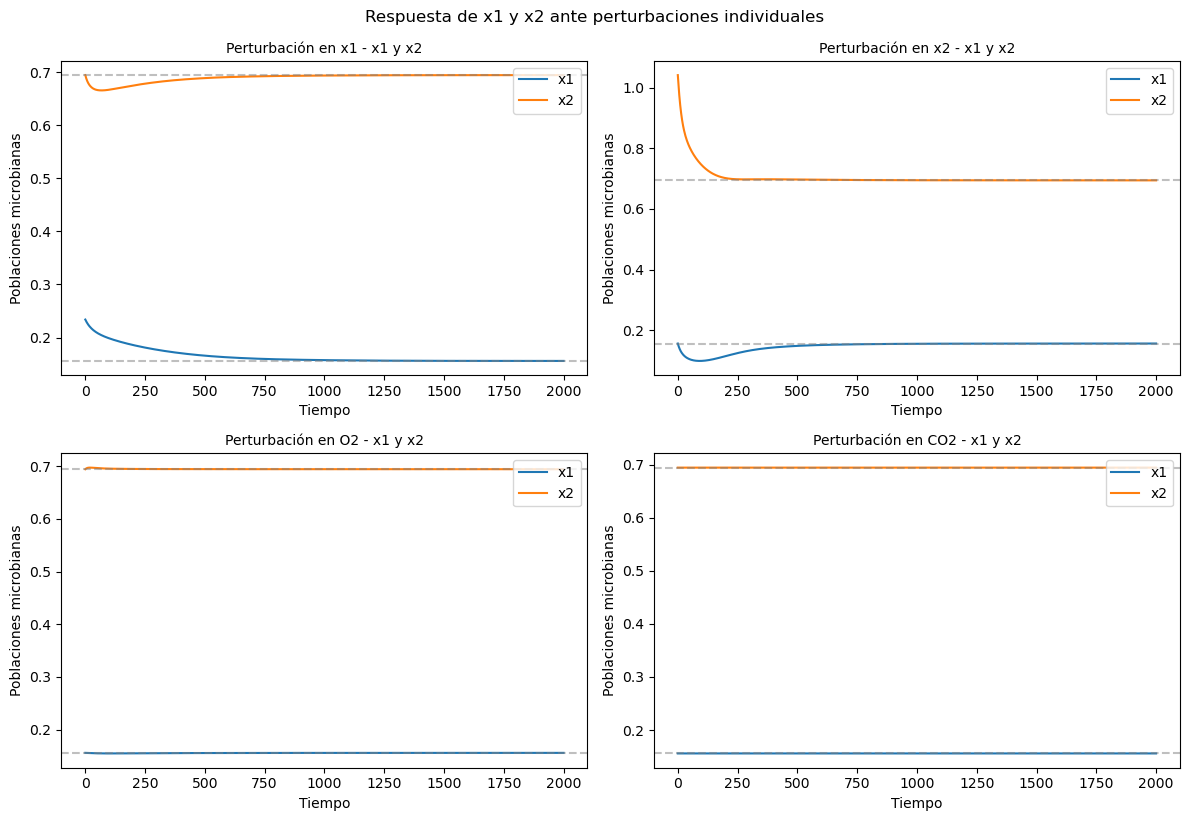

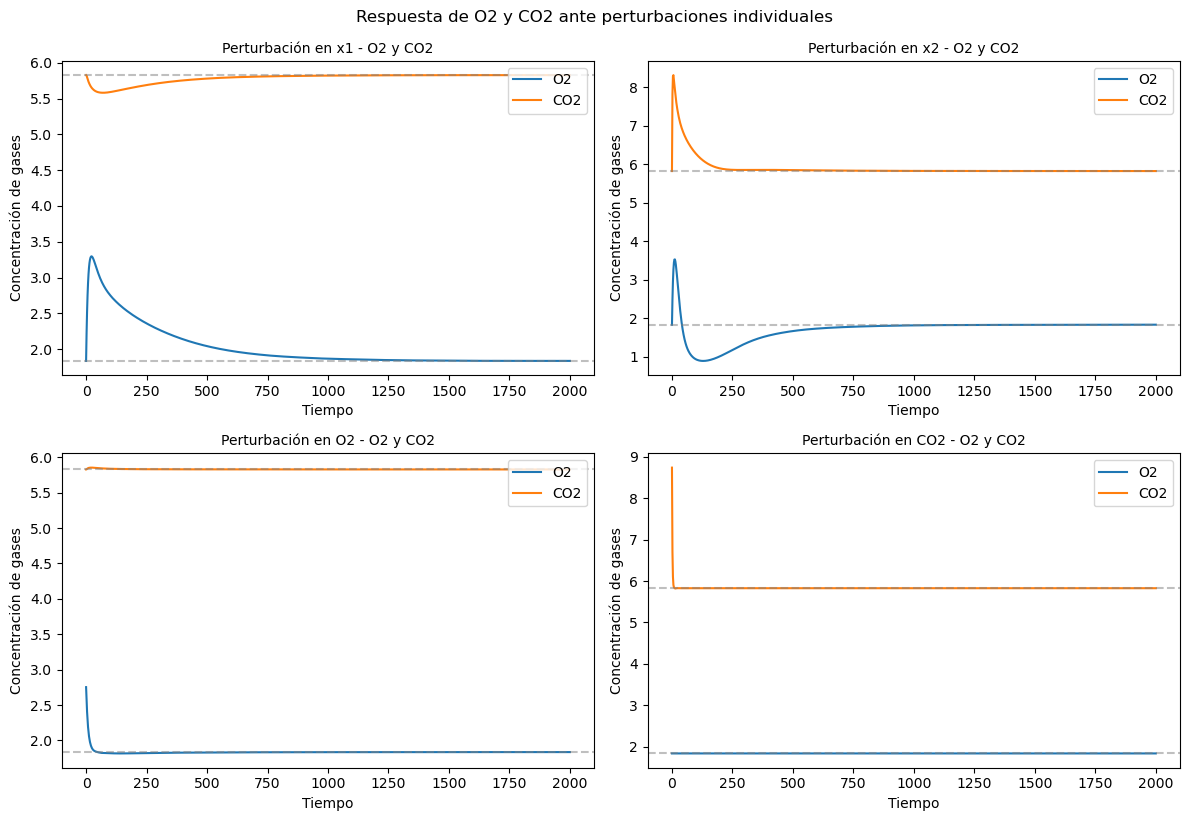

In [156]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
d_1, d_2 = 0.008, 0.005
c1 = 0.05425 
c2 = 0.0515
c3 = 1.99
c4 = 1.88
c5 = 0.684555
c6 = 5.06

# Sistema dinámico
def sistema(t, y):
    x1, x2, O2, CO2 = y
    dx1 = c1 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) - d_1 * x1
    dx2 = c2 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - d_2 * x2
    dO2 = c3 * x1 - c4 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - 0.1 * O2
    dCO2 = -c5 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) + c6 * x2 - 0.6 * CO2
    return [dx1, dx2, dO2, dCO2]

# Punto de equilibrio estimado (ajusta si lo tienes más preciso)
x1_eq, x2_eq, O2_eq, CO2_eq = 0.15588, 0.69413, 1.83500, 5.82758
equilibrio = np.array([x1_eq, x2_eq, O2_eq, CO2_eq])

# Perturbaciones del 1%
perturbaciones = np.eye(4) * 0.5 * equilibrio
labels = ['x1', 'x2', 'O2', 'CO2']

# Simulación temporal
t_span = (0, 2000)
t_eval = np.linspace(*t_span, 1000)

# Gráfico 1: x1 y x2
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for i in range(4):
    y0 = equilibrio.copy()
    y0[i] += perturbaciones[i, i]

    sol = solve_ivp(sistema, t_span, y0, t_eval=t_eval, method='BDF')

    axs[i].plot(sol.t, sol.y[0], label='x1')
    axs[i].plot(sol.t, sol.y[1], label='x2')
    axs[i].axhline(equilibrio[0], ls='--', color='gray', alpha=0.5)
    axs[i].axhline(equilibrio[1], ls='--', color='gray', alpha=0.5)
    axs[i].set_ylabel("Poblaciones microbianas")
    axs[i].set_xlabel("Tiempo")
    axs[i].legend(loc="upper right")
    axs[i].set_title(f"Perturbación en {labels[i]} - x1 y x2", fontsize=10)

plt.tight_layout()
plt.suptitle("Respuesta de x1 y x2 ante perturbaciones individuales", y=1.02)
plt.show()

# Gráfico 2: O2 y CO2
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for i in range(4):
    y0 = equilibrio.copy()
    y0[i] += perturbaciones[i, i]

    sol = solve_ivp(sistema, t_span, y0, t_eval=t_eval, method='BDF')

    axs[i].plot(sol.t, sol.y[2], label='O2')
    axs[i].plot(sol.t, sol.y[3], label='CO2')
    axs[i].axhline(equilibrio[2], ls='--', color='gray', alpha=0.5)
    axs[i].axhline(equilibrio[3], ls='--', color='gray', alpha=0.5)
    axs[i].set_ylabel("Concentración de gases")
    axs[i].set_xlabel("Tiempo")
    axs[i].legend(loc="upper right")
    axs[i].set_title(f"Perturbación en {labels[i]} - O2 y CO2", fontsize=10)

plt.tight_layout()
plt.suptitle("Respuesta de O2 y CO2 ante perturbaciones individuales", y=1.02)
plt.show()


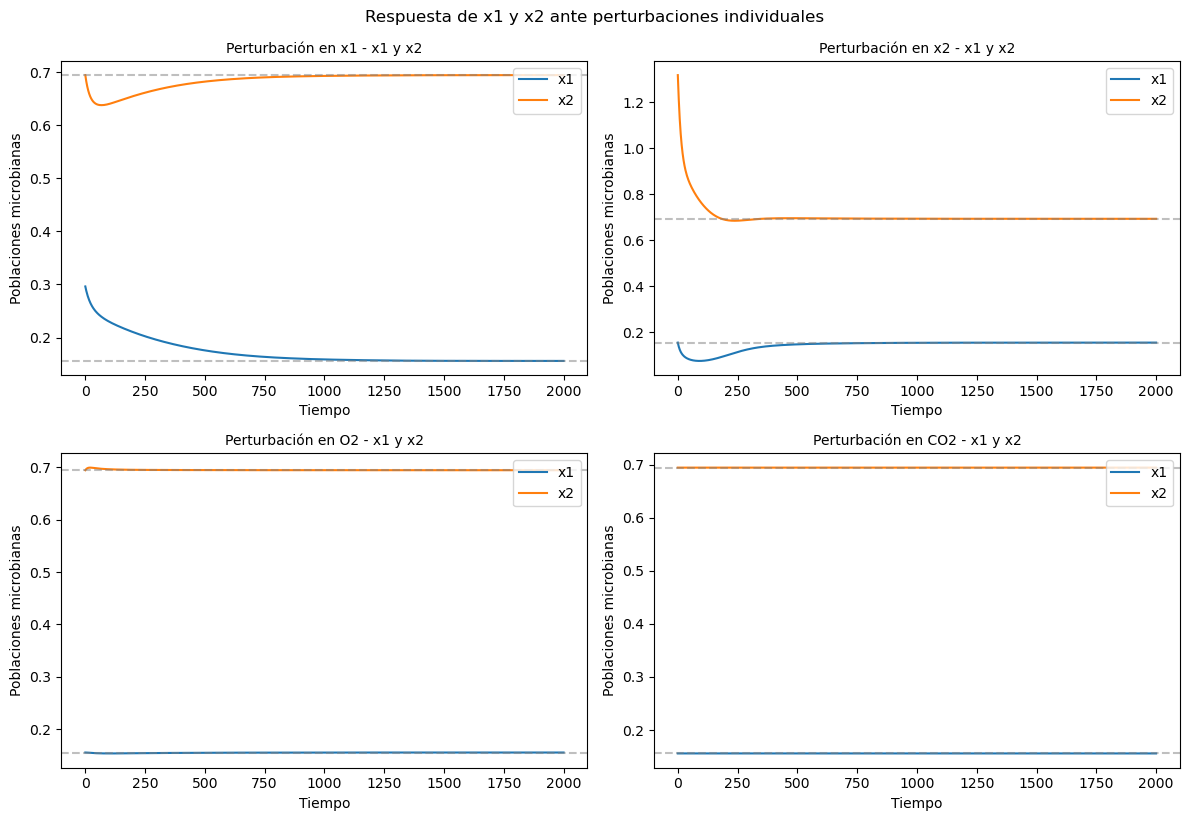

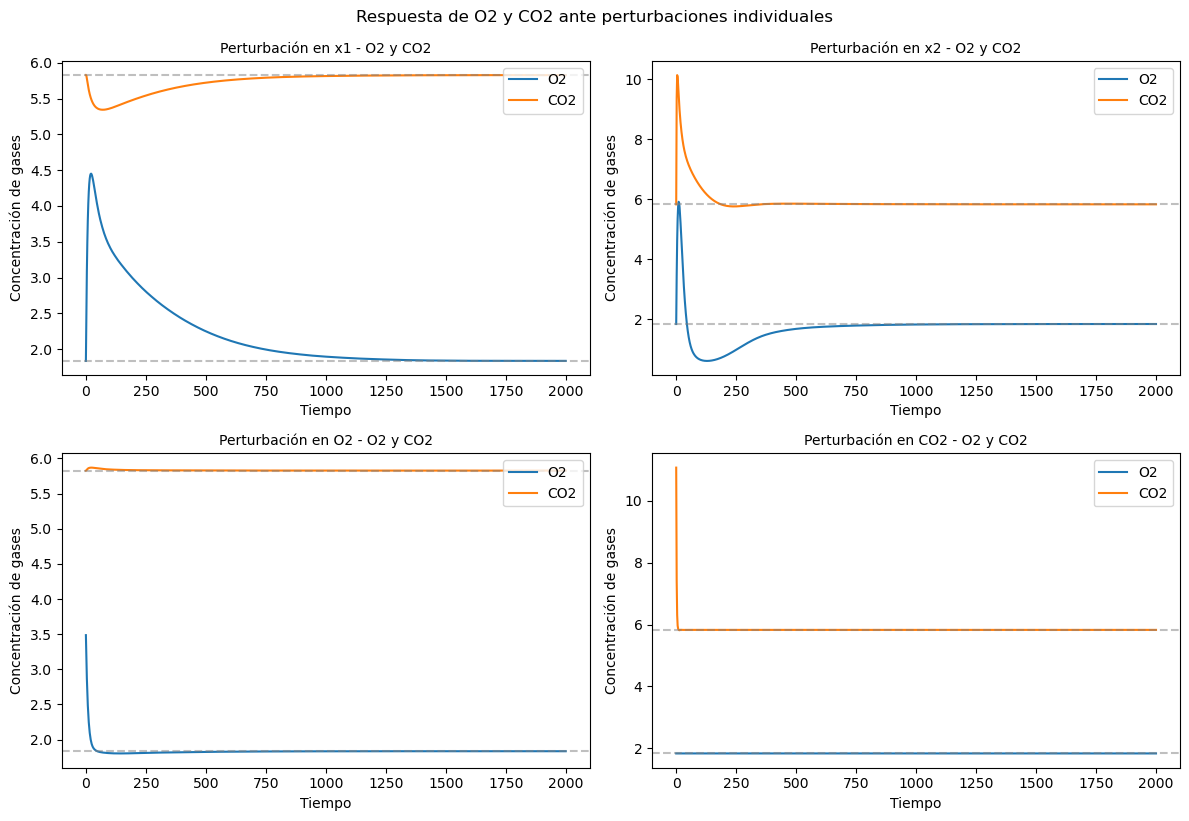

In [170]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parámetros del sistema
d_1, d_2 = 0.008, 0.005
c1 = 0.05425 
c2 = 0.0515
c3 = 1.99
c4 = 1.88
c5 = 0.684555
c6 = 5.06

# Sistema dinámico
def sistema(t, y):
    x1, x2, O2, CO2 = y
    dx1 = c1 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) - d_1 * x1
    dx2 = c2 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - d_2 * x2
    dO2 = c3 * x1 - c4 * (O2 / (1 + O2)) * x2 * (1 - x1 - x2) - 0.1 * O2
    dCO2 = -c5 * (CO2 / (0.1 + CO2)) * x1 * (1 - x1 - x2) + c6 * x2 - 0.6 * CO2
    return [dx1, dx2, dO2, dCO2]

# Punto de equilibrio estimado (ajusta si lo tienes más preciso)
x1_eq, x2_eq, O2_eq, CO2_eq = 0.15588, 0.69413, 1.83500, 5.82758
equilibrio = np.array([x1_eq, x2_eq, O2_eq, CO2_eq])

# Perturbaciones del 1%
perturbaciones = np.eye(4) * 0.9* equilibrio
labels = ['x1', 'x2', 'O2', 'CO2']

# Simulación temporal
t_span = (0, 2000)
t_eval = np.linspace(*t_span, 1000)

# Gráfico 1: x1 y x2
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for i in range(4):
    y0 = equilibrio.copy()
    y0[i] += perturbaciones[i, i]

    sol = solve_ivp(sistema, t_span, y0, t_eval=t_eval, method='BDF')

    axs[i].plot(sol.t, sol.y[0], label='x1')
    axs[i].plot(sol.t, sol.y[1], label='x2')
    axs[i].axhline(equilibrio[0], ls='--', color='gray', alpha=0.5)
    axs[i].axhline(equilibrio[1], ls='--', color='gray', alpha=0.5)
    axs[i].set_ylabel("Poblaciones microbianas")
    axs[i].set_xlabel("Tiempo")
    axs[i].legend(loc="upper right")
    axs[i].set_title(f"Perturbación en {labels[i]} - x1 y x2", fontsize=10)

plt.tight_layout()
plt.suptitle("Respuesta de x1 y x2 ante perturbaciones individuales", y=1.02)
plt.show()

# Gráfico 2: O2 y CO2
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
axs = axs.ravel()

for i in range(4):
    y0 = equilibrio.copy()
    y0[i] += perturbaciones[i, i]

    sol = solve_ivp(sistema, t_span, y0, t_eval=t_eval, method='BDF')

    axs[i].plot(sol.t, sol.y[2], label='O2')
    axs[i].plot(sol.t, sol.y[3], label='CO2')
    axs[i].axhline(equilibrio[2], ls='--', color='gray', alpha=0.5)
    axs[i].axhline(equilibrio[3], ls='--', color='gray', alpha=0.5)
    axs[i].set_ylabel("Concentración de gases")
    axs[i].set_xlabel("Tiempo")
    axs[i].legend(loc="upper right")
    axs[i].set_title(f"Perturbación en {labels[i]} - O2 y CO2", fontsize=10)

plt.tight_layout()
plt.suptitle("Respuesta de O2 y CO2 ante perturbaciones individuales", y=1.02)
plt.show()
